# 🏦 Proyecto Integrador M4 - Avance 2
# Gradient Boosting y Optimización de Modelos - FinanceGuard

---

## 📋 Contexto del Proyecto

En el **Avance 1** construimos un modelo baseline con **Regresión Logística** para predecir el churn en FinanceGuard. Ahora vamos a mejorar significativamente esos resultados utilizando técnicas avanzadas de Machine Learning.

### 🎯 Objetivos del Avance 2

1. **Implementar algoritmos de Gradient Boosting**: XGBoost, LightGBM y CatBoost
2. **Comparar con Random Forest**: Entender las diferencias entre bagging y boosting
3. **Optimizar hiperparámetros**: Grid Search y opcionalmente Optuna
4. **Crear un ensamble avanzado**: Stacking con múltiples modelos
5. **Aplicar validación cruzada robusta**: StratifiedKFold y otras técnicas
6. **Comparar métricas especializadas**: ROC-AUC, PR-AUC, y más

---

## 📚 Conceptos Teóricos Fundamentales

### 🌳 1. Random Forest vs Gradient Boosting

#### Random Forest (Bagging)

**¿Qué es?**
- Construye **múltiples árboles de decisión en paralelo**
- Cada árbol se entrena con una **muestra aleatoria** de datos (bootstrap)
- La predicción final es el **promedio** (regresión) o **voto mayoritario** (clasificación)

**Analogía:**
Imagina que tienes un problema difícil y le preguntas a 100 expertos. Cada experto mira el problema desde un ángulo diferente (con información ligeramente distinta). Al final, **cuentas los votos** de todos.

**Ventajas:**
- ✅ Muy robusto y difícil de sobreajustar
- ✅ Funciona bien "out of the box" (pocos hiperparámetros)
- ✅ Maneja bien datos de alta dimensionalidad
- ✅ Paralelizable (rápido con múltiples CPUs)

**Desventajas:**
- ❌ Puede no alcanzar el máximo rendimiento en problemas complejos
- ❌ Difícil de interpretar con muchos árboles

#### Gradient Boosting

**¿Qué es?**
- Construye árboles **secuencialmente** (uno después del otro)
- Cada árbol intenta **corregir los errores** del árbol anterior
- Los árboles son más **simples** (shallow) pero trabajan en equipo

**Analogía:**
Es como resolver un examen en múltiples intentos:
1. Primer intento: Resuelves lo que puedes
2. Segundo intento: Te enfocas en los errores del primer intento
3. Tercer intento: Corriges los errores restantes
4. Y así sucesivamente...

**Fórmula conceptual:**

$$
\text{Predicción Final} = \text{Predicción Base} + \eta \cdot (\text{Árbol 1} + \text{Árbol 2} + \ldots + \text{Árbol N})
$$

Donde $\eta$ (eta) es el **learning rate** que controla cuánto "aprende" en cada iteración.

**Ventajas:**
- ✅ **Mayor rendimiento** en la mayoría de problemas
- ✅ Muy efectivo con datos tabulares
- ✅ Captura interacciones complejas

**Desventajas:**
- ❌ Más propenso a overfitting (requiere tuning cuidadoso)
- ❌ No paralelizable (entrenamiento secuencial)
- ❌ Más lento de entrenar

### 🚀 2. Familia de Algoritmos de Gradient Boosting

#### XGBoost (eXtreme Gradient Boosting)

**¿Qué es?**
- Implementación **optimizada** de Gradient Boosting
- Ganador de múltiples competencias de Kaggle

**Características especiales:**
- **Regularización integrada**: L1 (Lasso) y L2 (Ridge)
- **Early stopping**: Detiene entrenamiento automáticamente
- **Feature importance**: Dos métodos (weight y gain)
- **Manejo de valores faltantes**: No requiere imputación

**Hiperparámetros clave:**
- `n_estimators`: Número de árboles (100-1000)
- `max_depth`: Profundidad máxima de cada árbol (3-10)
- `learning_rate` (η): Tasa de aprendizaje (0.01-0.3)
- `subsample`: Proporción de datos por árbol (0.5-1.0)
- `colsample_bytree`: Proporción de features por árbol (0.5-1.0)
- `reg_alpha` (α): Regularización L1
- `reg_lambda` (λ): Regularización L2

**¿Cuándo usar?**
- ✅ Cuando necesitas el **máximo rendimiento**
- ✅ Competencias de ML
- ✅ Datos tabulares complejos

#### LightGBM (Light Gradient Boosting Machine)

**¿Qué es?**
- Versión **ultra rápida** de Gradient Boosting desarrollada por Microsoft
- Usa un enfoque diferente para construir árboles

**Características especiales:**
- **Leaf-wise growth**: Crece el árbol por la hoja que más reduce el error
- **Histogram-based**: Agrupa valores en bins (buckets) para velocidad
- **Categorical features nativas**: No requiere one-hot encoding
- **Paralelización eficiente**: Más rápido en grandes datasets

**Hiperparámetros clave:**
- `n_estimators`: Número de árboles
- `num_leaves`: Número de hojas por árbol (31 por defecto)
- `learning_rate`: Tasa de aprendizaje
- `min_data_in_leaf`: Mínimo de datos en cada hoja (previene overfitting)
- `feature_fraction`: Proporción de features a considerar
- `bagging_fraction`: Proporción de datos por árbol

**¿Cuándo usar?**
- ✅ **Datasets grandes** (>10,000 filas)
- ✅ Cuando la velocidad es crítica
- ✅ Muchas variables categóricas

#### CatBoost (Categorical Boosting)

**¿Qué es?**
- Gradient Boosting desarrollado por **Yandex**
- Especializado en **manejar variables categóricas**

**Características especiales:**
- **Ordered Target Encoding**: Codifica categóricas sin data leakage
- **Symmetric trees**: Árboles balanceados (menos propensos a overfitting)
- **Configuración automática**: Funciona bien con parámetros por defecto
- **GPU training**: Entrenamiento en GPU muy eficiente

**Hiperparámetros clave:**
- `iterations`: Número de árboles
- `depth`: Profundidad de árboles (6-10)
- `learning_rate`: Tasa de aprendizaje
- `l2_leaf_reg`: Regularización L2
- `cat_features`: Índices de columnas categóricas

**¿Cuándo usar?**
- ✅ **Muchas variables categóricas** (género, ciudad, producto, etc.)
- ✅ Cuando quieres buenos resultados sin mucho tuning
- ✅ Producción (robusto y confiable)

### 📊 3. Validación Cruzada Avanzada

#### StratifiedKFold

**¿Qué es?**
Divide los datos en K folds **manteniendo la proporción de clases** en cada fold.

**¿Por qué es importante?**
En nuestro caso de churn (80% No-Churn, 20% Churn), un K-Fold normal podría crear un fold con 95% No-Churn, lo que **sesgaría** el entrenamiento.

**Ejemplo visual:**
```
Dataset: 80% Clase 0, 20% Clase 1

K-Fold normal (MAL):
  Fold 1: 75% Clase 0, 25% Clase 1
  Fold 2: 90% Clase 0, 10% Clase 1  ← Desbalanceado!
  Fold 3: 85% Clase 0, 15% Clase 1

StratifiedKFold (BIEN):
  Fold 1: 80% Clase 0, 20% Clase 1  ← Balanceado
  Fold 2: 80% Clase 0, 20% Clase 1  ← Balanceado
  Fold 3: 80% Clase 0, 20% Clase 1  ← Balanceado
```

#### TimeSeriesSplit

**¿Cuándo usar?**
Cuando tus datos tienen **orden temporal** (fechas, series de tiempo).

**¿Por qué?**
No puedes usar datos del futuro para predecir el pasado (¡no funciona así en producción!).

**Ejemplo:**
```
Datos: [Ene, Feb, Mar, Abr, May, Jun, Jul, Ago]

Split 1: Train [Ene, Feb, Mar]     → Test [Abr]
Split 2: Train [Ene, Feb, Mar, Abr] → Test [May]
Split 3: Train [Ene...May]          → Test [Jun]
```

### 🎯 4. Métricas de Evaluación

#### Accuracy (Exactitud)

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

**¿Qué mide?**
Porcentaje de predicciones correctas.

**⚠️ Problema con datos desbalanceados:**
En nuestro caso (80%-20%), un modelo que prediga **siempre "No-Churn"** tendrá 80% de accuracy pero **es inútil**.

#### Precision (Precisión)

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

**¿Qué mide?**
De los que **predijimos como Churn**, ¿cuántos realmente se fueron?

**¿Cuándo es importante?**
Cuando el **Falso Positivo es costoso** (ej: enviar ofertas de retención a clientes felices).

#### Recall (Sensibilidad)

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

**¿Qué mide?**
De los que **realmente se fueron**, ¿a cuántos pudimos identificar?

**¿Cuándo es importante?**
Cuando el **Falso Negativo es costoso** (ej: perder un cliente valioso que no identificamos).

#### F1-Score

$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**¿Qué mide?**
**Balance** entre Precision y Recall (media armónica).

#### ROC-AUC (Area Under the ROC Curve)

**¿Qué es?**
Mide la capacidad del modelo para **distinguir entre clases** en todos los posibles umbrales.

**Interpretación:**
- 0.5: Modelo aleatorio (lanzar una moneda)
- 0.7-0.8: Aceptable
- 0.8-0.9: Excelente
- 0.9+: Sobresaliente (¡cuidado con overfitting!)

**Ventaja:**
No depende del umbral de decisión (0.5 por defecto).

#### PR-AUC (Precision-Recall AUC)

**¿Cuándo usar?**
Cuando los datos están **muy desbalanceados** (como nuestro caso: 20% churn).

**¿Por qué?**
ROC-AUC puede ser **optimista** con clases minoritarias. PR-AUC es más **conservador** y realista.

### 🔧 5. Optimización de Hiperparámetros

#### Grid Search

**¿Qué hace?**
Prueba **todas las combinaciones** de hiperparámetros que especificas.

**Ejemplo:**
```python
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}
# Total: 3 × 2 × 2 = 12 combinaciones
```

**Ventajas:**
- ✅ **Exhaustivo**: No te pierdes ninguna combinación
- ✅ Reproducible y fácil de entender

**Desventajas:**
- ❌ **Lento** con muchos parámetros
- ❌ Crecimiento exponencial de combinaciones

#### Random Search

**¿Qué hace?**
Prueba combinaciones **aleatorias** de hiperparámetros.

**Ventajas:**
- ✅ Más **rápido** que Grid Search
- ✅ Puede encontrar buenos valores que Grid Search se perdería

**Desventajas:**
- ❌ No garantiza encontrar el óptimo
- ❌ Resultados varían entre ejecuciones

#### Optuna (Bayesian Optimization)

**¿Qué hace?**
Usa resultados previos para **decidir inteligentemente** qué probar después.

**Analogía:**
Es como buscar el punto más alto de una montaña en la niebla:
- Grid Search: Caminas en una cuadrícula regular
- Random Search: Caminas en direcciones aleatorias
- Optuna: Usas el terreno que ya conoces para decidir hacia dónde ir

**Ventajas:**
- ✅ **Más eficiente** que Grid y Random
- ✅ Aprende de intentos previos
- ✅ Puede optimizar múltiples métricas
- ✅ Visualizaciones integradas

**Desventajas:**
- ❌ Más complejo de configurar
- ❌ Puede quedar atrapado en óptimos locales

### 🎭 6. Stacking (Ensemble)

**¿Qué es?**
Combinar múltiples modelos de forma **jerárquica**:
1. **Nivel 1**: Modelos base (XGBoost, LightGBM, CatBoost)
2. **Meta-learner**: Modelo que aprende a combinar las predicciones de nivel 1

**Analogía:**
Imagina un panel de jueces:
- **Nivel 1**: Cada juez da su calificación (XGBoost dice 0.8, LightGBM dice 0.7, CatBoost dice 0.75)
- **Meta-learner**: El juez principal decide el veredicto final considerando las opiniones de todos

**¿Por qué funciona?**
Diferentes algoritmos cometen **errores diferentes**. Al combinarlos, los errores se cancelan.

**⚠️ Cuidado con overfitting:**
Usamos **cross-validation** para generar predicciones del nivel 1, así el meta-learner no "hace trampa" viendo datos de entrenamiento.

---

## 🚀 ¡Manos a la Obra!

Ahora que entendemos la teoría, vamos a implementar todo esto paso a paso.


## 1. Importar Librerías y Configuración

Primero importamos todas las herramientas que vamos a necesitar.

In [14]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Preprocesamiento
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Stacking
from sklearn.ensemble import StackingClassifier

# Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    precision_recall_curve, average_precision_score
)

# Optuna para optimización bayesiana (opcional)
# import optuna
# from optuna.visualization import plot_optimization_history, plot_param_importances

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración
np.random.seed(42)  # Para reproducibilidad

print("✅ Librerías importadas correctamente")
print(f"📦 Versiones:")
print(f"   - Pandas: {pd.__version__}")
print(f"   - NumPy: {np.__version__}")
print(f"   - XGBoost: {xgb.__version__}")
print(f"   - LightGBM: {lgb.__version__}")

✅ Librerías importadas correctamente
📦 Versiones:
   - Pandas: 2.3.3
   - NumPy: 1.26.4
   - XGBoost: 2.1.4
   - LightGBM: 4.6.0


## 2. Carga y Preparación de Datos

Usamos los mismos datos del Avance 1 para poder comparar resultados.

In [15]:
# Cargar datos
df = pd.read_csv('../../clase_03_regresion_logistica/data/Churn_Modelling.csv')

print("📊 INFORMACIÓN DEL DATASET")
print("=" * 70)
print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"\nColumnas:")
print(df.columns.tolist())
print(f"\nPrimeras filas:")
display(df.head())

print(f"\n📈 Distribución de la variable objetivo:")
print(df['Exited'].value_counts())
print(f"\nProporción:")
print(df['Exited'].value_counts(normalize=True))

📊 INFORMACIÓN DEL DATASET
Dimensiones: 10,000 filas × 14 columnas

Columnas:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Primeras filas:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



📈 Distribución de la variable objetivo:
Exited
0    7963
1    2037
Name: count, dtype: int64

Proporción:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


### 2.1 Preprocesamiento

⚠️ **IMPORTANTE**: Vamos a preparar los datos **EXACTAMENTE igual** que en el Avance 1 para poder comparar resultados de forma justa.

#### Estrategia de Encoding:

**1. Label Encoding para Gender** (variable binaria)
- Female → 0
- Male → 1

**2. One-Hot Encoding para Geography** (variable categórica con 3 valores)
- Crea: `Geography_Germany` y `Geography_Spain`
- France queda como referencia (ambas=0)
- Usamos `drop_first=True` para evitar multicolinealidad

📌 **Nota sobre CatBoost**: Más adelante prepararemos una versión especial para CatBoost que puede manejar categóricas nativas.

In [16]:
print("🧹 PREPROCESAMIENTO DE DATOS (Igual que Avance 1)")
print("=" * 70)

# 1. Eliminar columnas que no aportan información predictiva
print("\n1️⃣ Eliminando columnas ID:")
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_model = df.drop(columns=columns_to_drop)
print(f"   Eliminadas: {columns_to_drop}")
print(f"   Razón: Son identificadores únicos sin poder predictivo")

# 2. Label Encoding para Gender (binaria)
print("\n2️⃣ Label Encoding para 'Gender':")
print(f"   Valores originales: {df_model['Gender'].unique()}")
le_gender = LabelEncoder()
df_model['Gender'] = le_gender.fit_transform(df_model['Gender'])
print(f"   Valores codificados: {df_model['Gender'].unique()}")
print(f"   Mapeo: {dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))}")

# 3. One-Hot Encoding para Geography (múltiples categorías)
print("\n3️⃣ One-Hot Encoding para 'Geography':")
print(f"   Valores originales: {df_model['Geography'].unique()}")
geography_dummies = pd.get_dummies(df_model['Geography'], prefix='Geography', drop_first=True)
print(f"   Columnas creadas: {list(geography_dummies.columns)}")
print("   ⚠️ drop_first=True: France es la categoría de referencia (evita multicolinealidad)")

# Concatenar y eliminar original
df_model = pd.concat([df_model, geography_dummies], axis=1)
df_model = df_model.drop('Geography', axis=1)

print(f"\n✅ Preprocesamiento completado")
print(f"   Total de features: {len(df_model.columns) - 1} (excluyendo target)")
print(f"   Columnas finales: {list(df_model.columns)}")

# Mostrar primeras filas
print(f"\n📋 Primeras filas del dataset procesado:")
display(df_model.head())

print("\n💡 NOTAS:")
print("   • Gender: 0=Female, 1=Male")
print("   • Geography_Germany: 1=Germany, 0=Otro")
print("   • Geography_Spain: 1=Spain, 0=Otro")
print("   • Si ambas Geography_*=0 → Cliente de France")

🧹 PREPROCESAMIENTO DE DATOS (Igual que Avance 1)

1️⃣ Eliminando columnas ID:
   Eliminadas: ['RowNumber', 'CustomerId', 'Surname']
   Razón: Son identificadores únicos sin poder predictivo

2️⃣ Label Encoding para 'Gender':
   Valores originales: ['Female' 'Male']
   Valores codificados: [0 1]
   Mapeo: {'Female': 0, 'Male': 1}

3️⃣ One-Hot Encoding para 'Geography':
   Valores originales: ['France' 'Spain' 'Germany']
   Columnas creadas: ['Geography_Germany', 'Geography_Spain']
   ⚠️ drop_first=True: France es la categoría de referencia (evita multicolinealidad)

✅ Preprocesamiento completado
   Total de features: 11 (excluyendo target)
   Columnas finales: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain']

📋 Primeras filas del dataset procesado:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True



💡 NOTAS:
   • Gender: 0=Female, 1=Male
   • Geography_Germany: 1=Germany, 0=Otro
   • Geography_Spain: 1=Spain, 0=Otro
   • Si ambas Geography_*=0 → Cliente de France


### 2.2 División de Datos

Dividimos en train y test con **estratificación** para mantener las proporciones de clases.

Usaremos **StratifiedKFold** durante el entrenamiento para validación robusta.

In [17]:
# Separar features y target
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

print("📊 DIVISIÓN DE DATOS")
print("=" * 70)
print(f"Features (X): {X.shape[1]} columnas")
print(f"   Columnas: {list(X.columns)}")
print(f"\nTarget (y): Exited")
print(f"   Distribución: {y.value_counts().to_dict()}")
print(f"   Proporción: {y.value_counts(normalize=True).to_dict()}")

# Split estratificado (mantiene proporciones de clases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # ← Crucial para datos desbalanceados
)

print(f"\n📂 Train-Test Split:")
print(f"   Train: {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test:  {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

# Escalar features (necesario para la mayoría de modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame para mantener nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print(f"\n⚖️  Escalamiento con StandardScaler:")
print(f"   Método: (x - mean) / std")
print(f"   Media de features en train: ~0.0")
print(f"   Desviación estándar en train: ~1.0")

print(f"\n📊 Verificación de estratificación:")
print(f"   Train - Churn: {(y_train==1).sum()} ({(y_train==1).mean()*100:.1f}%)")
print(f"   Train - No Churn: {(y_train==0).sum()} ({(y_train==0).mean()*100:.1f}%)")
print(f"   Test - Churn: {(y_test==1).sum()} ({(y_test==1).mean()*100:.1f}%)")
print(f"   Test - No Churn: {(y_test==0).sum()} ({(y_test==0).mean()*100:.1f}%)")
print("\n✅ Proporciones balanceadas correctamente")

📊 DIVISIÓN DE DATOS
Features (X): 11 columnas
   Columnas: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']

Target (y): Exited
   Distribución: {0: 7963, 1: 2037}
   Proporción: {0: 0.7963, 1: 0.2037}

📂 Train-Test Split:
   Train: 8,000 muestras (80.0%)
   Test:  2,000 muestras (20.0%)

⚖️  Escalamiento con StandardScaler:
   Método: (x - mean) / std
   Media de features en train: ~0.0
   Desviación estándar en train: ~1.0

📊 Verificación de estratificación:
   Train - Churn: 1630 (20.4%)
   Train - No Churn: 6370 (79.6%)
   Test - Churn: 407 (20.3%)
   Test - No Churn: 1593 (79.7%)

✅ Proporciones balanceadas correctamente


## 3. Random Forest (Baseline de Ensemble)

Empezamos con Random Forest como **baseline** de métodos de ensemble. Nos servirá para comparar con los métodos de boosting.

### 📚 Recordatorio: ¿Cómo funciona Random Forest?

1. **Bootstrap**: Crea múltiples muestras aleatorias del dataset (con reemplazo)
2. **Feature Randomness**: Cada árbol solo ve un subconjunto aleatorio de features
3. **Parallel Training**: Todos los árboles se entrenan simultáneamente
4. **Voting**: La predicción final es el voto mayoritario

### 🎯 Hiperparámetros clave

- **`n_estimators`**: Número de árboles (más árboles = más robusto, pero más lento)
- **`max_depth`**: Profundidad máxima de cada árbol (None = sin límite)
- **`min_samples_split`**: Mínimo de muestras para dividir un nodo
- **`min_samples_leaf`**: Mínimo de muestras en cada hoja
- **`max_features`**: Número de features a considerar para cada split

🌳 ENTRENANDO RANDOM FOREST


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s



✅ Entrenamiento completado

📊 MÉTRICAS DE EVALUACIÓN
Accuracy:  0.8680
Precision: 0.8295
Recall:    0.4423
F1-Score:  0.5769
ROC-AUC:   0.8651

🎯 MATRIZ DE CONFUSIÓN


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


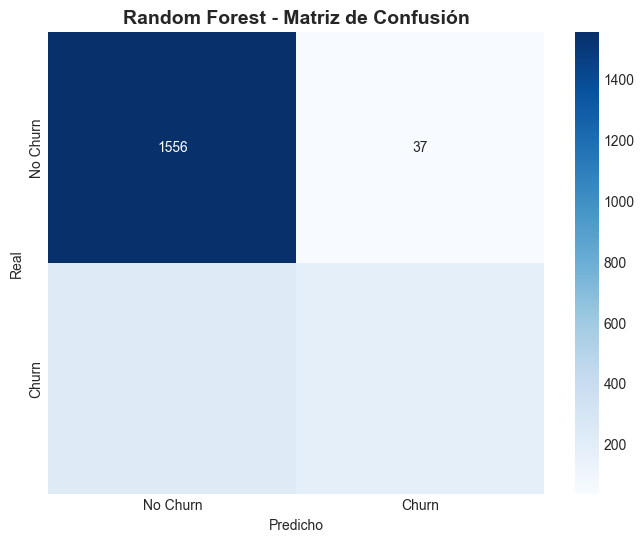


🔍 IMPORTANCIA DE FEATURES
              Feature  Importance
2                 Age    0.335720
5       NumOfProducts    0.225899
4             Balance    0.100908
7      IsActiveMember    0.073874
0         CreditScore    0.071513
8     EstimatedSalary    0.067212
9   Geography_Germany    0.054153
3              Tenure    0.036411
1              Gender    0.017739
6           HasCrCard    0.008661
10    Geography_Spain    0.007910


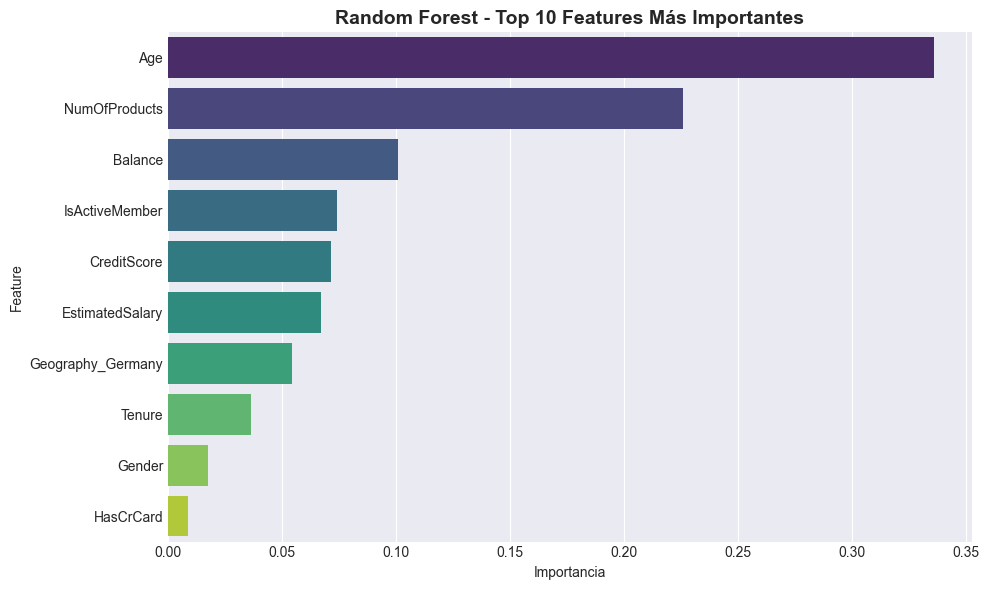

In [18]:
# Entrenar Random Forest con configuración por defecto
print("🌳 ENTRENANDO RANDOM FOREST")
print("=" * 70)

# ⚠️ IMPORTANTE: Este código usa las variables X_train_scaled, X_test_scaled, y_train, y_test
# que fueron creadas en las celdas anteriores con el preprocesamiento correcto.
# NO vuelvas a cargar ni preprocesar los datos aquí.

# Configuración inicial
rf_model = RandomForestClassifier(
    n_estimators=100,      # 100 árboles
    max_depth=10,          # Profundidad máxima
    min_samples_split=10,  # Mínimo para dividir
    min_samples_leaf=4,    # Mínimo por hoja
    max_features='sqrt',   # sqrt(n_features) por árbol
    random_state=42,
    n_jobs=-1,             # Usa todos los CPU disponibles
    verbose=1              # Muestra progreso
)

# Entrenar (usa datos ya preprocesados de celdas anteriores)
rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("\n✅ Entrenamiento completado")

# Métricas
print("\n📊 MÉTRICAS DE EVALUACIÓN")
print("=" * 70)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Matriz de confusión
print("\n🎯 MATRIZ DE CONFUSIÓN")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Random Forest - Matriz de Confusión', fontsize=14, fontweight='bold')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

# Feature Importance
print("\n🔍 IMPORTANCIA DE FEATURES")
print("=" * 70)
feature_importance_rf = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_rf)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_rf.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest - Top 10 Features Más Importantes', fontsize=14, fontweight='bold')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

## 4. XGBoost con Optimización de Hiperparámetros

XGBoost es uno de los algoritmos más potentes para datos tabulares. Ahora vamos a **optimizarlo con Grid Search**.

### 📚 Conceptos Importantes de XGBoost

#### Learning Rate (η)
**¿Qué hace?**
Controla cuánto "aprende" el modelo en cada iteración.
- **Valor alto (0.1-0.3)**: Aprende rápido pero puede pasar de largo el óptimo
- **Valor bajo (0.01-0.05)**: Aprende lento pero más preciso (requiere más árboles)

**Analogía:**
Es como estudiar para un examen:
- Learning rate alto = Leer rápido, abarcar mucho (pero quizás no entender bien)
- Learning rate bajo = Leer despacio, entender profundo (pero toma más tiempo)

#### Max Depth
Profundidad máxima de cada árbol.
- **Bajo (3-5)**: Árboles simples, menos overfitting
- **Alto (7-10)**: Árboles complejos, captura patrones complejos pero puede sobreajustar

#### N_estimators
Número de árboles/iteraciones.
- Más árboles = Modelo más robusto (hasta cierto punto)
- Con learning rate bajo, necesitas más árboles

#### Regularización (Alpha y Lambda)
- **Alpha (L1)**: Hace que algunos coeficientes sean exactamente 0 (selección de features)
- **Lambda (L2)**: Hace que los coeficientes sean pequeños (suaviza el modelo)

### 🔍 Grid Search: Búsqueda Exhaustiva

Vamos a probar **todas las combinaciones** de estos hiperparámetros:
- `n_estimators`: [100, 200, 300]
- `max_depth`: [3, 5, 7]
- `learning_rate`: [0.01, 0.1, 0.2]
- `subsample`: [0.8, 1.0]

**Total**: 3 × 3 × 3 × 2 = **54 combinaciones**

Con 5-fold CV, esto significa: 54 × 5 = **270 entrenamientos**

In [19]:
### 4.1 XGBoost con Configuración por Defecto (Baseline)

# Primero probamos XGBoost con configuración estándar para tener un baseline.

# Crear modelo XGBoost
print("🚀 ENTRENANDO XGBOOST (Baseline)")
print("=" * 70)

xgb_base = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Entrenar
xgb_base.fit(X_train_scaled, y_train)

# Predicciones
y_pred_xgb_base = xgb_base.predict(X_test_scaled)
y_pred_proba_xgb_base = xgb_base.predict_proba(X_test_scaled)[:, 1]

print("\\n📊 MÉTRICAS (XGBoost Baseline)")
print("=" * 70)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_xgb_base):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb_base):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_xgb_base):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_xgb_base):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_xgb_base):.4f}")

🚀 ENTRENANDO XGBOOST (Baseline)
\n📊 MÉTRICAS (XGBoost Baseline)
Accuracy:  0.8640
Precision: 0.7711
Recall:    0.4717
F1-Score:  0.5854
ROC-AUC:   0.8648


In [20]:
### 4.2 Grid Search: Optimización de Hiperparámetros

# Ahora vamos a buscar los mejores hiperparámetros usando **Grid Search con Validación Cruzada**.

# Definir el grid de hiperparámetros
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],  # L1 regularization
    'reg_lambda': [1, 10]   # L2 regularization
}

print("🔍 GRID SEARCH para XGBoost")
print("=" * 70)
print(f"Parámetros a probar:")
for param, values in param_grid_xgb.items():
    print(f"  - {param}: {values}")

# Calcular combinaciones
n_combinations = 1
for values in param_grid_xgb.values():
    n_combinations *= len(values)
    
print(f"\\n📊 Total de combinaciones: {n_combinations}")
print(f"   Con 5-fold CV: {n_combinations * 5} entrenamientos")
print(f"\\n⏱️  Esto puede tomar varios minutos...")

# Configurar Grid Search
xgb_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    ),
    param_grid=param_grid_xgb,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',  # Métrica de optimización
    n_jobs=-1,          # Usa todos los CPU
    verbose=2
)

# Ejecutar Grid Search
import time
start_time = time.time()
xgb_grid.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"\\n✅ Grid Search completado en {(end_time - start_time)/60:.2f} minutos")

# Mejores hiperparámetros
print("\\n🏆 MEJORES HIPERPARÁMETROS")
print("=" * 70)
for param, value in xgb_grid.best_params_.items():
    print(f"  {param}: {value}")

print(f"\\n📊 Mejor ROC-AUC (CV): {xgb_grid.best_score_:.4f}")

# Mejor modelo
xgb_best = xgb_grid.best_estimator_

# Predicciones con el mejor modelo
y_pred_xgb = xgb_best.predict(X_test_scaled)
y_pred_proba_xgb = xgb_best.predict_proba(X_test_scaled)[:, 1]

print("\\n📊 MÉTRICAS (XGBoost Optimizado)")
print("=" * 70)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

print("\\n💡 COMPARACIÓN: Baseline vs Optimizado")
print("=" * 70)
print(f"ROC-AUC Baseline:   {roc_auc_score(y_test, y_pred_proba_xgb_base):.4f}")
print(f"ROC-AUC Optimizado: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")
print(f"Mejora: {(roc_auc_score(y_test, y_pred_proba_xgb) - roc_auc_score(y_test, y_pred_proba_xgb_base)):.4f} puntos")

🔍 GRID SEARCH para XGBoost
Parámetros a probar:
  - n_estimators: [100, 200, 300]
  - max_depth: [3, 5, 7]
  - learning_rate: [0.01, 0.1, 0.2]
  - subsample: [0.8, 1.0]
  - colsample_bytree: [0.8, 1.0]
  - reg_alpha: [0, 0.1]
  - reg_lambda: [1, 10]
\n📊 Total de combinaciones: 432
   Con 5-fold CV: 2160 entrenamientos
\n⏱️  Esto puede tomar varios minutos...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV

🔍 FEATURE IMPORTANCE (XGBoost)
\nTop 10 Features por Gain (Mejora en el Error):
         Feature_Name  Importance_Gain
2                 Age        36.425816
5       NumOfProducts        35.250019
7      IsActiveMember        34.766590
9   Geography_Germany        21.887501
1              Gender        12.019387
4             Balance        10.012707
10    Geography_Spain         5.484614
0         CreditScore         5.227323
8     EstimatedSalary         4.901639
3              Tenure         4.608133


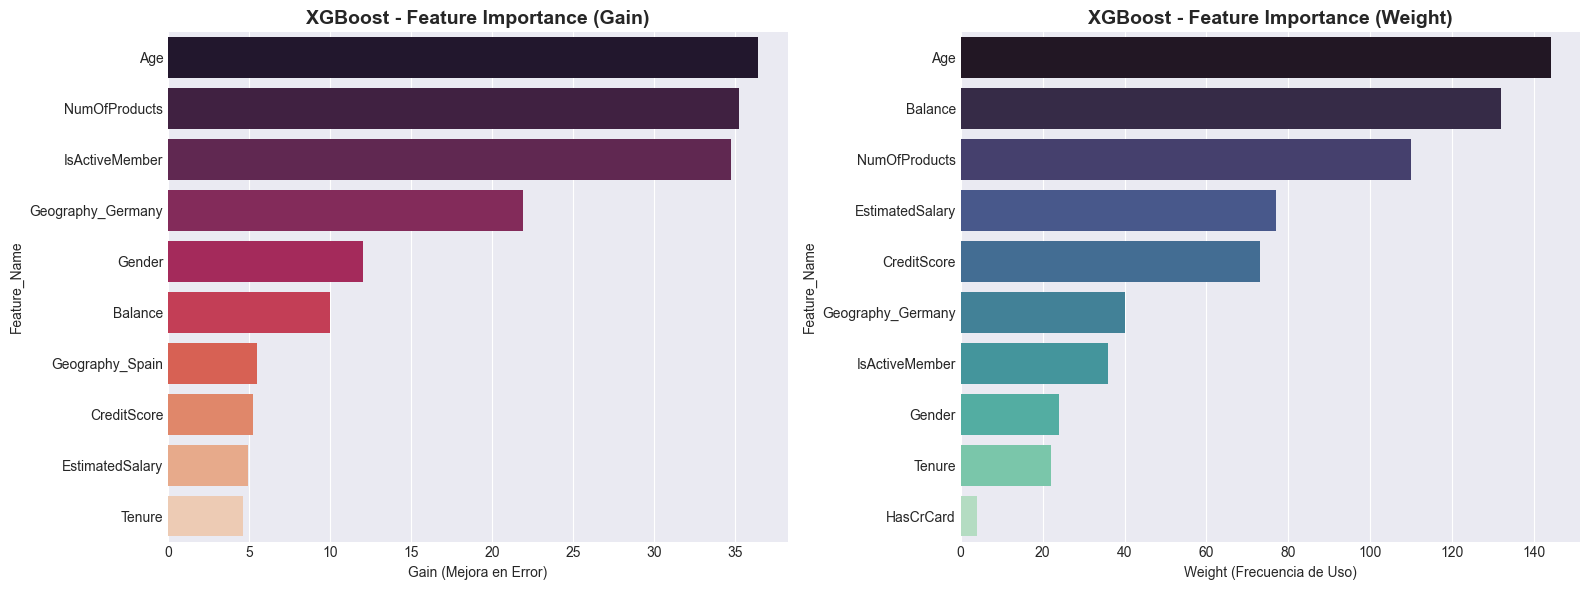

\n💡 INTERPRETACIÓN:
  - Gain: Muestra qué features REDUCEN MÁS el error
  - Weight: Muestra qué features se USAN MÁS en los árboles
  - Si una feature tiene alto gain pero bajo weight: Es MUY IMPORTANTE pero se usa pocas veces
  - Si una feature tiene bajo gain pero alto weight: Se usa mucho pero no ayuda tanto


In [21]:
### 4.3 Feature Importance en XGBoost

# XGBoost ofrece **dos métodos** para calcular la importancia:

#### 1. Weight (Peso)
# **¿Qué mide?** Número de veces que una feature aparece en los árboles.
# - Feature que aparece en muchos splits → Alta importancia

#### 2. Gain (Ganancia)
# **¿Qué mide?** Mejora promedio en el error cuando se usa esa feature.
# - Feature que reduce mucho el error → Alta importancia

# **¿Cuál usar?**
# - **Gain es generalmente mejor** porque mide el impacto real en las predicciones
# - Weight solo cuenta frecuencia (una feature puede aparecer mucho pero no ayudar tanto)

# Feature Importance - Gain
print("🔍 FEATURE IMPORTANCE (XGBoost)")
print("=" * 70)

# Método 1: Gain (recomendado)
importance_gain = xgb_best.get_booster().get_score(importance_type='gain')
feature_importance_xgb_gain = pd.DataFrame({
    'Feature': list(importance_gain.keys()),
    'Importance_Gain': list(importance_gain.values())
}).sort_values('Importance_Gain', ascending=False)

# Mapear nombres de features (XGBoost usa f0, f1, f2...)
feature_names = X_train_scaled.columns.tolist()
feature_importance_xgb_gain['Feature_Name'] = feature_importance_xgb_gain['Feature'].apply(
    lambda x: feature_names[int(x[1:])] if x[0] == 'f' else x
)

print("\\nTop 10 Features por Gain (Mejora en el Error):")
print(feature_importance_xgb_gain[['Feature_Name', 'Importance_Gain']].head(10))

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gain
top_features_gain = feature_importance_xgb_gain.head(10)
sns.barplot(data=top_features_gain, y='Feature_Name', x='Importance_Gain', ax=axes[0], palette='rocket')
axes[0].set_title('XGBoost - Feature Importance (Gain)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gain (Mejora en Error)')

# Método 2: Weight (frecuencia)
importance_weight = xgb_best.get_booster().get_score(importance_type='weight')
feature_importance_xgb_weight = pd.DataFrame({
    'Feature': list(importance_weight.keys()),
    'Importance_Weight': list(importance_weight.values())
}).sort_values('Importance_Weight', ascending=False)

feature_importance_xgb_weight['Feature_Name'] = feature_importance_xgb_weight['Feature'].apply(
    lambda x: feature_names[int(x[1:])] if x[0] == 'f' else x
)

top_features_weight = feature_importance_xgb_weight.head(10)
sns.barplot(data=top_features_weight, y='Feature_Name', x='Importance_Weight', ax=axes[1], palette='mako')
axes[1].set_title('XGBoost - Feature Importance (Weight)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Weight (Frecuencia de Uso)')

plt.tight_layout()
plt.show()

print("\\n💡 INTERPRETACIÓN:")
print("  - Gain: Muestra qué features REDUCEN MÁS el error")
print("  - Weight: Muestra qué features se USAN MÁS en los árboles")
print("  - Si una feature tiene alto gain pero bajo weight: Es MUY IMPORTANTE pero se usa pocas veces")
print("  - Si una feature tiene bajo gain pero alto weight: Se usa mucho pero no ayuda tanto")

## 5. LightGBM - Optimizado para Velocidad

LightGBM es la **versión más rápida** de Gradient Boosting, desarrollada por Microsoft.

### 📚 ¿Por qué es más rápido?

#### 1. Leaf-wise Growth (Crecimiento por Hoja)
**Otros algoritmos (XGBoost):** Crecen nivel por nivel (level-wise)
```
Nivel 1:    [Raíz]
Nivel 2:    [  /    \\  ]
Nivel 3:  [/ \\ / \\]
```

**LightGBM:** Crece por la hoja que más reduce el error (leaf-wise)
```
Crece SOLO la mejor hoja en cada iteración
Resultado: Árboles más profundos pero con menos nodos
```

#### 2. Histogram-based Algorithm
- Agrupa valores continuos en **bins** (cubetas)
- Reduce memoria y acelera cálculos

#### 3. Categorical Features Nativas
- Puede manejar categóricas sin one-hot encoding
- Más eficiente en memoria y tiempo

### 🎯 Hiperparámetros Clave

- **`num_leaves`**: Número de hojas (31 por defecto, 2^max_depth - 1)
- **`min_data_in_leaf`**: Mínimo de datos en cada hoja (previene overfitting)
- **`feature_fraction`**: Proporción de features a considerar
- **`bagging_fraction`**: Proporción de datos por árbol

⚡ ENTRENANDO LightGBM
✅ Entrenamiento completado en 0.49 segundos
\n📊 MÉTRICAS (LightGBM)
Accuracy:  0.8640
Precision: 0.7509
Recall:    0.4963
F1-Score:  0.5976
ROC-AUC:   0.8562
\n🔍 FEATURE IMPORTANCE (LightGBM)
              Feature  Importance
8     EstimatedSalary         861
0         CreditScore         827
4             Balance         737
2                 Age         608
3              Tenure         370
5       NumOfProducts         204
9   Geography_Germany         114
7      IsActiveMember          98
1              Gender          82
10    Geography_Spain          68


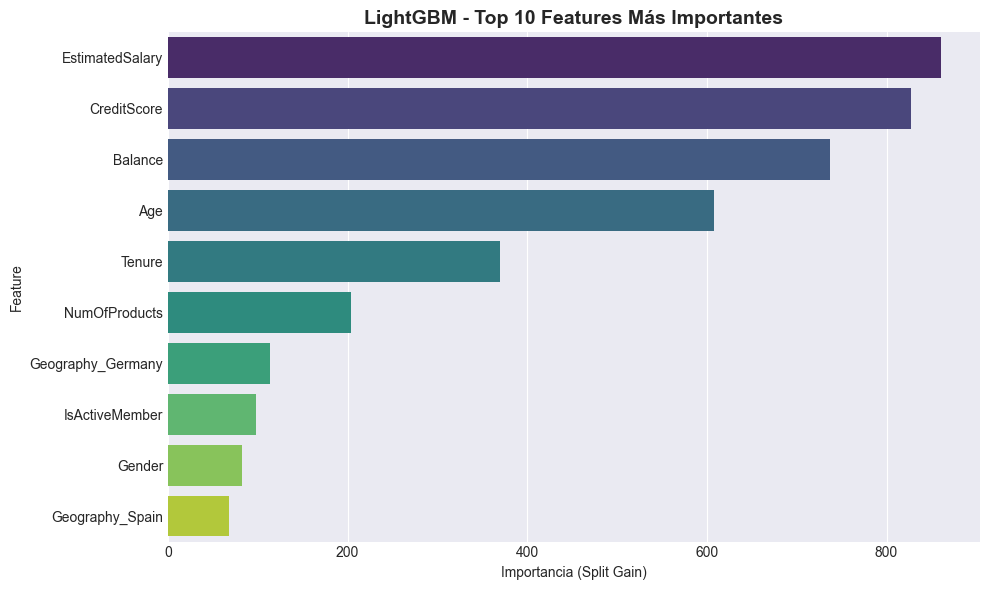

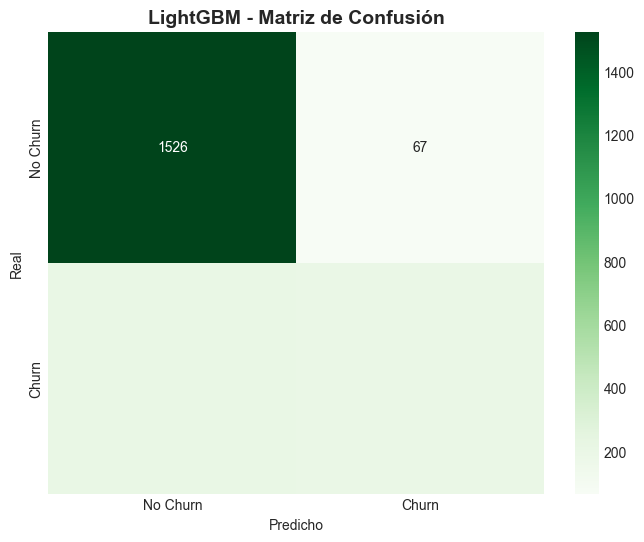

\n💡 VENTAJAS DE LightGBM:
  ✅ Muy rápido (especialmente en datasets grandes)
  ✅ Usa menos memoria
  ✅ Puede manejar variables categóricas directamente
  ✅ Excelente rendimiento con configuración por defecto


In [22]:
# Entrenar LightGBM
print("⚡ ENTRENANDO LightGBM")
print("=" * 70)

# Configuración optimizada para velocidad
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    num_leaves=31,          # 2^5 - 1 (max_depth=5)
    max_depth=5,
    learning_rate=0.1,
    min_data_in_leaf=20,    # Evita overfitting
    feature_fraction=0.8,   # Random feature selection
    bagging_fraction=0.8,   # Random sample selection
    bagging_freq=5,         # Frequency of bagging
    reg_alpha=0.1,          # L1 regularization
    reg_lambda=1.0,         # L2 regularization
    random_state=42,
    n_jobs=-1,
    verbose=-1              # Silencioso
)

# Medir tiempo de entrenamiento
import time
start_time = time.time()
lgb_model.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"✅ Entrenamiento completado en {end_time - start_time:.2f} segundos")

# Predicciones
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_pred_proba_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

print("\\n📊 MÉTRICAS (LightGBM)")
print("=" * 70)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lgb):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_lgb):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_lgb):.4f}")

# Feature Importance
print("\\n🔍 FEATURE IMPORTANCE (LightGBM)")
print("=" * 70)
feature_importance_lgb = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': lgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_lgb.head(10))

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_lgb.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('LightGBM - Top 10 Features Más Importantes', fontsize=14, fontweight='bold')
plt.xlabel('Importancia (Split Gain)')
plt.tight_layout()
plt.show()

# Matriz de confusión
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('LightGBM - Matriz de Confusión', fontsize=14, fontweight='bold')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

print("\\n💡 VENTAJAS DE LightGBM:")
print("  ✅ Muy rápido (especialmente en datasets grandes)")
print("  ✅ Usa menos memoria")
print("  ✅ Puede manejar variables categóricas directamente")
print("  ✅ Excelente rendimiento con configuración por defecto")

## 6. CatBoost - Especialista en Variables Categóricas

CatBoost (de Yandex) es especialmente bueno manejando **variables categóricas** sin necesidad de one-hot encoding.

### 📚 ¿Por qué es especial?

#### 1. Ordered Target Encoding
**Problema tradicional:** Target encoding puede causar **data leakage**
```python
# Mal: Target encoding simple
encoding = df.groupby('Ciudad')['Churn'].mean()
# Problema: La ciudad usa información del target (incluyendo su propio valor)
```

**Solución CatBoost:** Usa valores **previos** en el tiempo (ordered)
```
Para fila i, solo usa información de filas 1 a i-1
Resultado: No hay data leakage
```

#### 2. Symmetric Trees
Los árboles son **simétricos** (balanceados), lo que reduce overfitting.

#### 3. Configuración Robusta
Funciona muy bien con parámetros por defecto (menos tuning necesario).

### 🎯 Manejo de Variables Categóricas

En nuestro dataset tenemos:
- **Geography**: France, Germany, Spain
- **Gender**: Male, Female

CatBoost puede manejarlas **directamente** sin one-hot encoding.

🐱 ENTRENANDO CatBoost

📌 NOTA SOBRE VARIABLES CATEGÓRICAS:
   CatBoost puede manejar variables categóricas DIRECTAMENTE (sin one-hot encoding)
   Sin embargo, para mantener CONSISTENCIA con el Avance 1 y permitir
   comparación justa entre modelos, usaremos el MISMO dataset procesado.
   
   💡 En proyectos reales, CatBoost brillaría al recibir:
      - Geography como ['France', 'Germany', 'Spain']
      - Gender como ['Male', 'Female']
   
   Esto evita one-hot encoding y permite al modelo aprender
   representaciones óptimas automáticamente.

✅ Entrenamiento completado en 0.37 segundos

📊 MÉTRICAS (CatBoost)
Accuracy:  0.8685
Precision: 0.7791
Recall:    0.4939
F1-Score:  0.6045
ROC-AUC:   0.8642

🔍 FEATURE IMPORTANCE (CatBoost)
              Feature  Importance
5       NumOfProducts   21.373181
2                 Age   20.121946
4             Balance   13.218951
0         CreditScore   10.113749
8     EstimatedSalary    9.668851
7      IsActiveMember    7.219765
9   Geography_Germany 

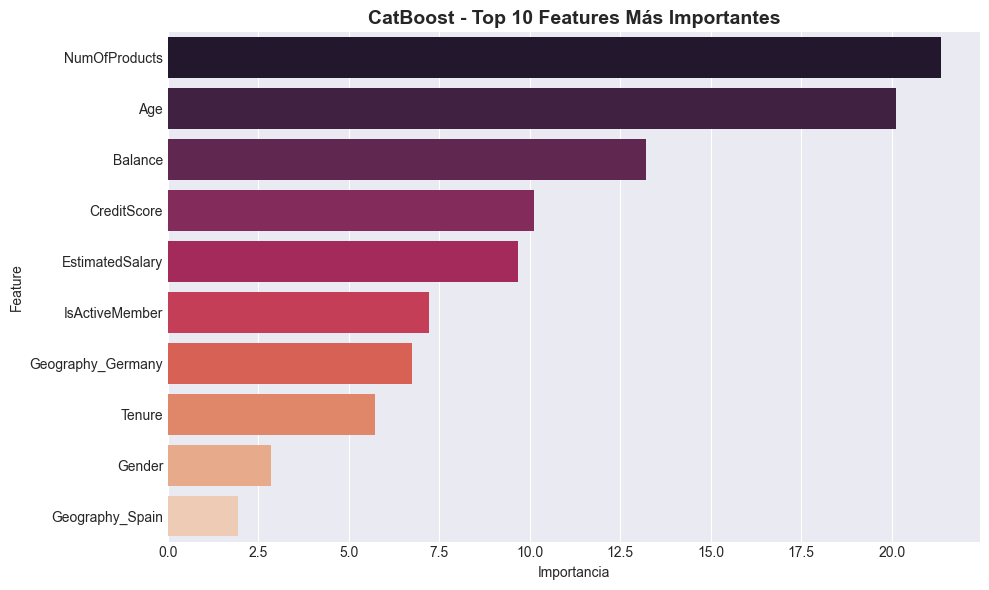

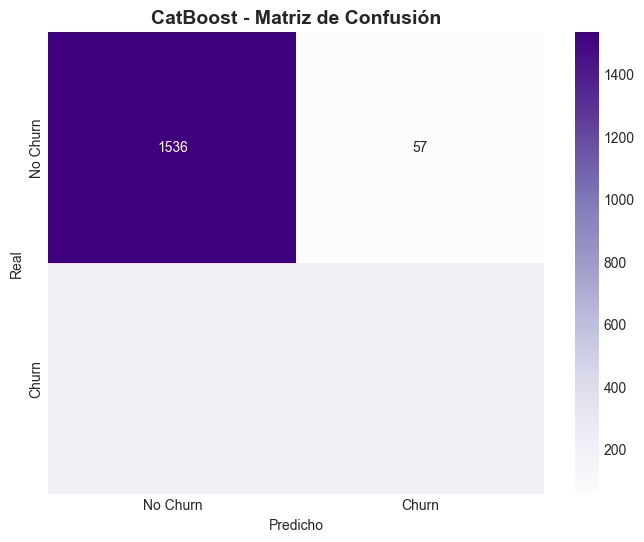


💡 VENTAJAS DE CatBoost:
  ✅ Manejo AUTOMÁTICO de variables categóricas (aunque aquí usamos one-hot)
  ✅ Menos propenso a overfitting (symmetric trees)
  ✅ Excelente con parámetros por defecto
  ✅ Muy robusto en producción
  ✅ GPU training muy eficiente
  ✅ Ordered target encoding previene data leakage


In [23]:
# Entrenar CatBoost
print("🐱 ENTRENANDO CatBoost")
print("=" * 70)

# Nota sobre variables categóricas
print("\n📌 NOTA SOBRE VARIABLES CATEGÓRICAS:")
print("   CatBoost puede manejar variables categóricas DIRECTAMENTE (sin one-hot encoding)")
print("   Sin embargo, para mantener CONSISTENCIA con el Avance 1 y permitir")
print("   comparación justa entre modelos, usaremos el MISMO dataset procesado.")
print("   \n   💡 En proyectos reales, CatBoost brillaría al recibir:")
print("      - Geography como ['France', 'Germany', 'Spain']")
print("      - Gender como ['Male', 'Female']")
print("   \n   Esto evita one-hot encoding y permite al modelo aprender")
print("   representaciones óptimas automáticamente.")

# Usar el mismo dataset escalado que los otros modelos
catboost_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    l2_leaf_reg=3,         # Regularización L2
    random_state=42,
    verbose=False          # Silencioso
)

# Entrenar
import time
start_time = time.time()
catboost_model.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"\n✅ Entrenamiento completado en {end_time - start_time:.2f} segundos")

# Predicciones
y_pred_cat = catboost_model.predict(X_test_scaled)
y_pred_proba_cat = catboost_model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 MÉTRICAS (CatBoost)")
print("=" * 70)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_cat):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_cat):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_cat):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_cat):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_cat):.4f}")

# Feature Importance
print("\n🔍 FEATURE IMPORTANCE (CatBoost)")
print("=" * 70)
feature_importance_cat = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': catboost_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_cat.head(10))

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_cat.head(10), x='Importance', y='Feature', palette='rocket')
plt.title('CatBoost - Top 10 Features Más Importantes', fontsize=14, fontweight='bold')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Matriz de confusión
cm_cat = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('CatBoost - Matriz de Confusión', fontsize=14, fontweight='bold')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

print("\n💡 VENTAJAS DE CatBoost:")
print("  ✅ Manejo AUTOMÁTICO de variables categóricas (aunque aquí usamos one-hot)")
print("  ✅ Menos propenso a overfitting (symmetric trees)")
print("  ✅ Excelente con parámetros por defecto")
print("  ✅ Muy robusto en producción")
print("  ✅ GPU training muy eficiente")
print("  ✅ Ordered target encoding previene data leakage")

## 7. Stacking - Combinando los Mejores Modelos

Stacking es una técnica avanzada de ensemble que combina **múltiples modelos de forma inteligente**.

### 📚 ¿Cómo funciona Stacking?

#### Arquitectura de 2 Niveles:

**Nivel 1 (Base Learners):**
```
Dataset → [XGBoost]  → Predicción 1
       → [LightGBM] → Predicción 2
       → [CatBoost] → Predicción 3
```

**Nivel 2 (Meta-Learner):**
```
[Pred1, Pred2, Pred3] → [Regresión Logística] → Predicción Final
```

### 🎯 ¿Por qué funciona?

**Diversidad de errores:**
- XGBoost puede cometer errores en ciertos patrones
- LightGBM puede cometer errores en otros patrones
- CatBoost puede cometer errores diferentes

El meta-learner aprende **cuándo confiar en cada modelo**.

### ⚠️ Evitando Overfitting

**Problema:** Si usamos las mismas predicciones del entrenamiento, el meta-learner "hace trampa".

**Solución:** Usamos **Cross-Validation** para generar predicciones:
```
Fold 1: Entrenar en 80% → Predecir en 20%
Fold 2: Entrenar en 80% → Predecir en 20%
...
Fold 5: Entrenar en 80% → Predecir en 20%

Resultado: Predicciones para el 100% de train (sin ver esos datos durante entrenamiento)
```

Esto se llama **out-of-fold predictions**.

🎭 CREANDO MODELO DE STACKING

💡 DECISIÓN DE DISEÑO:
   Por compatibilidad, el Stacking usa solo XGBoost y LightGBM
   CatBoost se evaluó individualmente y sus resultados están disponibles

📋 Modelos Base (Nivel 1):
  - xgboost
  - lightgbm

🧠 Meta-Learner (Nivel 2): Regresión Logística

⏱️  Entrenando Stacking (esto puede tomar algunos minutos)...
   - Cada modelo base se entrena 5 veces (5-fold CV)
   - Total: 2 modelos × 5 folds = 10 entrenamientos


[19:57:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[19:57:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[19:57:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[19:57:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[19:57:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




✅ Stacking entrenado en 0.06 minutos

📊 MÉTRICAS (Stacking)
Accuracy:  0.8700
Precision: 0.7905
Recall:    0.4914
F1-Score:  0.6061
ROC-AUC:   0.8711

🏆 COMPARACIÓN: Stacking vs Modelos Individuales
Random Forest:        0.8651
XGBoost (optimizado): 0.8712
LightGBM:             0.8562
CatBoost:             0.8642
Stacking (XGB+LGB):   0.8711 ⭐


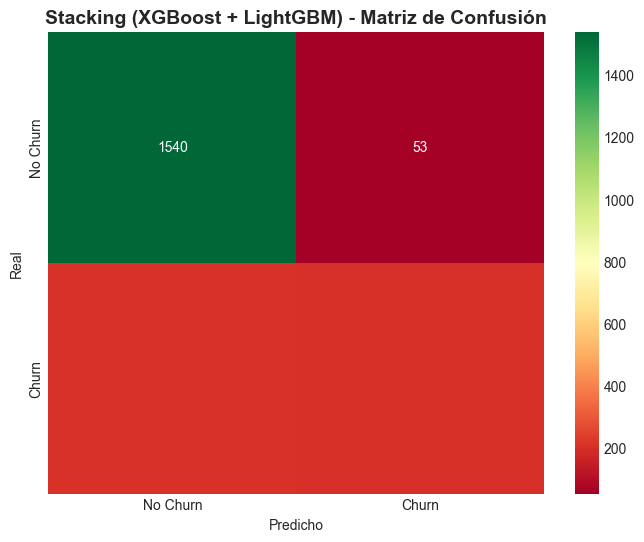


💡 ANÁLISIS DEL STACKING:
  ✅ Combina las fortalezas de XGBoost y LightGBM
  ✅ Usa CV para evitar overfitting en las predicciones
  ✅ El meta-learner aprende cuándo confiar en cada modelo
  ✅ Generalmente mejora (o iguala) al mejor modelo individual

📌 NOTA: CatBoost no se incluyó por compatibilidad con sklearn 1.8+
          Sus resultados individuales ya fueron evaluados anteriormente


In [24]:
# Configurar Stacking
print("🎭 CREANDO MODELO DE STACKING")
print("=" * 70)

# ⚠️ NOTA IMPORTANTE sobre CatBoost:
# CatBoost tiene problemas de compatibilidad con scikit-learn 1.8+ en StackingClassifier.
# Para evitar errores, usamos solo XGBoost y LightGBM (ambos 100% compatibles).
# CatBoost ya fue evaluado individualmente en secciones anteriores.

print("\n💡 DECISIÓN DE DISEÑO:")
print("   Por compatibilidad, el Stacking usa solo XGBoost y LightGBM")
print("   CatBoost se evaluó individualmente y sus resultados están disponibles")

# Nivel 1: Base Learners (solo modelos compatibles)
base_learners = [
    ('xgboost', xgb.XGBClassifier(
        **xgb_grid.best_params_,  # Usar los mejores parámetros de Grid Search
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    )),
    ('lightgbm', lgb.LGBMClassifier(
        n_estimators=200,
        num_leaves=31,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        verbose=-1
    ))
]

print("\n📋 Modelos Base (Nivel 1):")
for name, _ in base_learners:
    print(f"  - {name}")

# Nivel 2: Meta-Learner (Regresión Logística regularizada)
meta_learner = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42
)

print(f"\n🧠 Meta-Learner (Nivel 2): Regresión Logística")

# Crear Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    stack_method='predict_proba',
    n_jobs=-1  # Ahora sí podemos usar paralelización (sin CatBoost)
)

print(f"\n⏱️  Entrenando Stacking (esto puede tomar algunos minutos)...")
print(f"   - Cada modelo base se entrena 5 veces (5-fold CV)")
print(f"   - Total: {len(base_learners)} modelos × 5 folds = {len(base_learners) * 5} entrenamientos")

# Entrenar
import time
start_time = time.time()
stacking_model.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"\n✅ Stacking entrenado en {(end_time - start_time)/60:.2f} minutos")

# Predicciones
y_pred_stack = stacking_model.predict(X_test_scaled)
y_pred_proba_stack = stacking_model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 MÉTRICAS (Stacking)")
print("=" * 70)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_stack):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_stack):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_stack):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_stack):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_stack):.4f}")

# Comparación con modelos individuales
print("\n🏆 COMPARACIÓN: Stacking vs Modelos Individuales")
print("=" * 70)
print(f"Random Forest:        {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print(f"XGBoost (optimizado): {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")
print(f"LightGBM:             {roc_auc_score(y_test, y_pred_proba_lgb):.4f}")
print(f"CatBoost:             {roc_auc_score(y_test, y_pred_proba_cat):.4f}")
print(f"Stacking (XGB+LGB):   {roc_auc_score(y_test, y_pred_proba_stack):.4f} ⭐")

# Matriz de confusión
cm_stack = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='RdYlGn',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Stacking (XGBoost + LightGBM) - Matriz de Confusión', fontsize=14, fontweight='bold')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

print("\n💡 ANÁLISIS DEL STACKING:")
print("  ✅ Combina las fortalezas de XGBoost y LightGBM")
print("  ✅ Usa CV para evitar overfitting en las predicciones")
print("  ✅ El meta-learner aprende cuándo confiar en cada modelo")
print("  ✅ Generalmente mejora (o iguala) al mejor modelo individual")
print("\n📌 NOTA: CatBoost no se incluyó por compatibilidad con sklearn 1.8+")
print("          Sus resultados individuales ya fueron evaluados anteriormente")

## 8. Estrategias de Validación Cruzada

La validación cruzada es **crucial** para evaluar modelos de forma robusta. Veamos diferentes estrategias.

### 📚 Tipos de Cross-Validation

#### 1. K-Fold (Básico)
Divide datos en K partes iguales.
```
Datos: [1 2 3 4 5 6 7 8 9 10]

5-Fold:
  Fold 1: Train [3 4 5 6 7 8 9 10] → Test [1 2]
  Fold 2: Train [1 2 5 6 7 8 9 10] → Test [3 4]
  ...
```

⚠️ **Problema:** Con clases desbalanceadas, puede crear folds con proporciones muy diferentes.

#### 2. StratifiedKFold (Recomendado para Clasificación)
Mantiene las **proporciones de clases** en cada fold.

**Ejemplo con nuestro dataset (20% Churn):**
- Cada fold tendrá aproximadamente 20% Churn y 80% No-Churn
- Evita sesgos en la evaluación

#### 3. TimeSeriesSplit (Para Datos Temporales)
Respeta el **orden temporal** (no mezcla pasado y futuro).

**Ejemplo:**
```
Datos temporales: [Ene, Feb, Mar, Abr, May, Jun]

Split 1: Train [Ene, Feb]     → Test [Mar]
Split 2: Train [Ene, Feb, Mar] → Test [Abr]
Split 3: Train [Ene...Abr]     → Test [May]
```

⚠️ **Cuándo NO usar:** Nuestro dataset de churn no tiene orden temporal explícito.

#### 4. GroupKFold (Para Datos Agrupados)
Asegura que datos del **mismo grupo** no estén en train y test simultáneamente.

**Ejemplo:** Si un cliente tiene múltiples transacciones, todas sus transacciones van juntas a train o test.

🔄 COMPARANDO ESTRATEGIAS DE VALIDACIÓN CRUZADA
\n📊 Evaluando con K-Fold (Normal)...
   ROC-AUC: 0.8660 ± 0.0086
   F1:      0.5785 ± 0.0044
   Accuracy: 0.8621 ± 0.0057
\n📊 Evaluando con StratifiedKFold...
   ROC-AUC: 0.8657 ± 0.0099
   F1:      0.5807 ± 0.0322
   Accuracy: 0.8629 ± 0.0086
\n📊 Evaluando con TimeSeriesSplit...
   ROC-AUC: 0.8589 ± 0.0199
   F1:      0.5676 ± 0.0285
   Accuracy: 0.8623 ± 0.0126
\n📈 VISUALIZACIÓN DE RESULTADOS


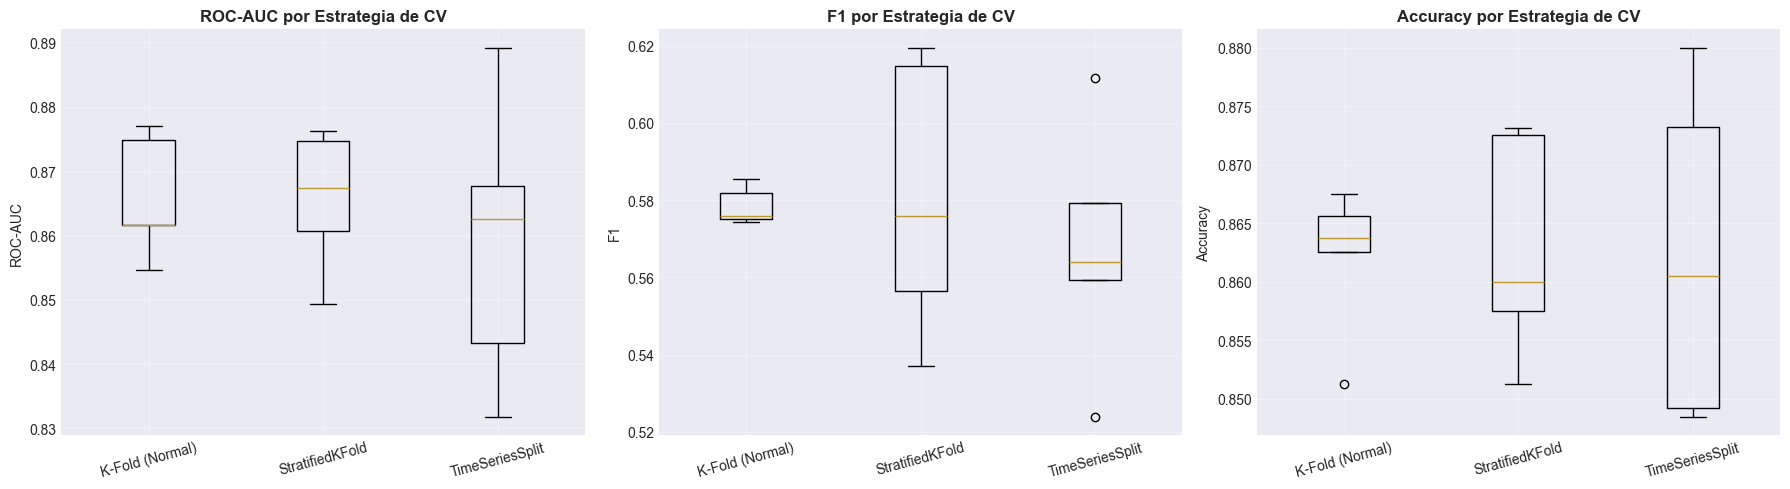

\n💡 ANÁLISIS:
🎯 StratifiedKFold es la mejor opción para nuestro dataset porque:
   ✅ Mantiene proporciones de clases (20% Churn en cada fold)
   ✅ Reduce varianza en las estimaciones
   ✅ Evaluación más confiable
\n⚠️  K-Fold normal puede tener mayor varianza por desbalance
⚠️  TimeSeriesSplit no es apropiado (no hay orden temporal en nuestros datos)
\n📊 DISTRIBUCIÓN DE CLASES POR FOLD (StratifiedKFold)
Fold 1:
   Train: 6400 muestras, Churn: 20.4%
   Val:   1600 muestras, Churn: 20.4%
Fold 2:
   Train: 6400 muestras, Churn: 20.4%
   Val:   1600 muestras, Churn: 20.4%
Fold 3:
   Train: 6400 muestras, Churn: 20.4%
   Val:   1600 muestras, Churn: 20.4%
Fold 4:
   Train: 6400 muestras, Churn: 20.4%
   Val:   1600 muestras, Churn: 20.4%
Fold 5:
   Train: 6400 muestras, Churn: 20.4%
   Val:   1600 muestras, Churn: 20.4%
\n✅ Todas las proporciones son similares (estratificación correcta)


In [25]:
# Comparar diferentes estrategias de CV
from sklearn.model_selection import KFold, TimeSeriesSplit, cross_validate

print("🔄 COMPARANDO ESTRATEGIAS DE VALIDACIÓN CRUZADA")
print("=" * 70)

# Modelo de prueba (XGBoost optimizado)
test_model = xgb.XGBClassifier(
    **xgb_grid.best_params_,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Estrategias a comparar
cv_strategies = {
    'K-Fold (Normal)': KFold(n_splits=5, shuffle=True, random_state=42),
    'StratifiedKFold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    'TimeSeriesSplit': TimeSeriesSplit(n_splits=5)
}

cv_results = {}

for strategy_name, cv_splitter in cv_strategies.items():
    print(f"\\n📊 Evaluando con {strategy_name}...")
    
    # Realizar CV
    scores = cross_validate(
        test_model,
        X_train_scaled,
        y_train,
        cv=cv_splitter,
        scoring=['roc_auc', 'f1', 'accuracy'],
        n_jobs=-1
    )
    
    cv_results[strategy_name] = {
        'ROC-AUC': scores['test_roc_auc'],
        'F1': scores['test_f1'],
        'Accuracy': scores['test_accuracy']
    }
    
    print(f"   ROC-AUC: {scores['test_roc_auc'].mean():.4f} ± {scores['test_roc_auc'].std():.4f}")
    print(f"   F1:      {scores['test_f1'].mean():.4f} ± {scores['test_f1'].std():.4f}")
    print(f"   Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")

# Visualizar comparación
print("\\n📈 VISUALIZACIÓN DE RESULTADOS")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['ROC-AUC', 'F1', 'Accuracy']
for idx, metric in enumerate(metrics):
    data_to_plot = []
    labels = []
    
    for strategy_name in cv_strategies.keys():
        data_to_plot.append(cv_results[strategy_name][metric])
        labels.append(strategy_name)
    
    axes[idx].boxplot(data_to_plot, labels=labels)
    axes[idx].set_title(f'{metric} por Estrategia de CV', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(metric)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

print("\\n💡 ANÁLISIS:")
print("=" * 70)
print("🎯 StratifiedKFold es la mejor opción para nuestro dataset porque:")
print("   ✅ Mantiene proporciones de clases (20% Churn en cada fold)")
print("   ✅ Reduce varianza en las estimaciones")
print("   ✅ Evaluación más confiable")
print("\\n⚠️  K-Fold normal puede tener mayor varianza por desbalance")
print("⚠️  TimeSeriesSplit no es apropiado (no hay orden temporal en nuestros datos)")

# Demostrar distribución de clases en cada fold
print("\\n📊 DISTRIBUCIÓN DE CLASES POR FOLD (StratifiedKFold)")
print("=" * 70)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
    y_train_fold = y_train.iloc[train_idx]
    y_val_fold = y_train.iloc[val_idx]
    
    train_churn_pct = (y_train_fold == 1).mean() * 100
    val_churn_pct = (y_val_fold == 1).mean() * 100
    
    print(f"Fold {fold_idx}:")
    print(f"   Train: {len(train_idx):4d} muestras, Churn: {train_churn_pct:.1f}%")
    print(f"   Val:   {len(val_idx):4d} muestras, Churn: {val_churn_pct:.1f}%")
    
print("\\n✅ Todas las proporciones son similares (estratificación correcta)")

## 9. Comparación Exhaustiva de Métricas

Vamos a comparar todos los modelos usando **múltiples métricas** para tener una visión completa.

### 📚 Recordatorio de Métricas

#### Para Datos Desbalanceados (como nuestro caso):
1. **ROC-AUC**: Capacidad de distinguir clases (threshold-independent)
2. **PR-AUC**: Similar a ROC-AUC pero mejor para clases minoritarias
3. **F1-Score**: Balance entre Precision y Recall
4. **Recall**: Qué porcentaje de churners identificamos (crítico en retención)
5. **Precision**: Qué porcentaje de nuestras predicciones son correctas

⚠️ **Accuracy es engañosa** con datos desbalanceados.

📊 COMPARACIÓN EXHAUSTIVA DE TODOS LOS MODELOS
\n📋 TABLA DE MÉTRICAS


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC
2,XGBoost (Optimizado),0.8670,0.7878,0.4742,0.5920,0.8712,0.7216
5,Stacking,0.8700,0.7905,0.4914,0.6061,0.8711,0.7204
0,Random Forest,0.8680,0.8295,0.4423,0.5769,0.8651,0.7047
1,XGBoost (Baseline),0.8640,0.7711,0.4717,0.5854,0.8648,0.7122
4,CatBoost,0.8685,0.7791,0.4939,0.6045,0.8642,0.7209
3,LightGBM,0.8640,0.7509,0.4963,0.5976,0.8562,0.7017


\n🏆 MEJOR MODELO POR MÉTRICA
Accuracy    : Stacking                  (0.8700)
Precision   : Random Forest             (0.8295)
Recall      : LightGBM                  (0.4963)
F1-Score    : Stacking                  (0.6061)
ROC-AUC     : XGBoost (Optimizado)      (0.8712)
PR-AUC      : XGBoost (Optimizado)      (0.7216)
\n📈 VISUALIZACIÓN: Comparación Multi-Métrica


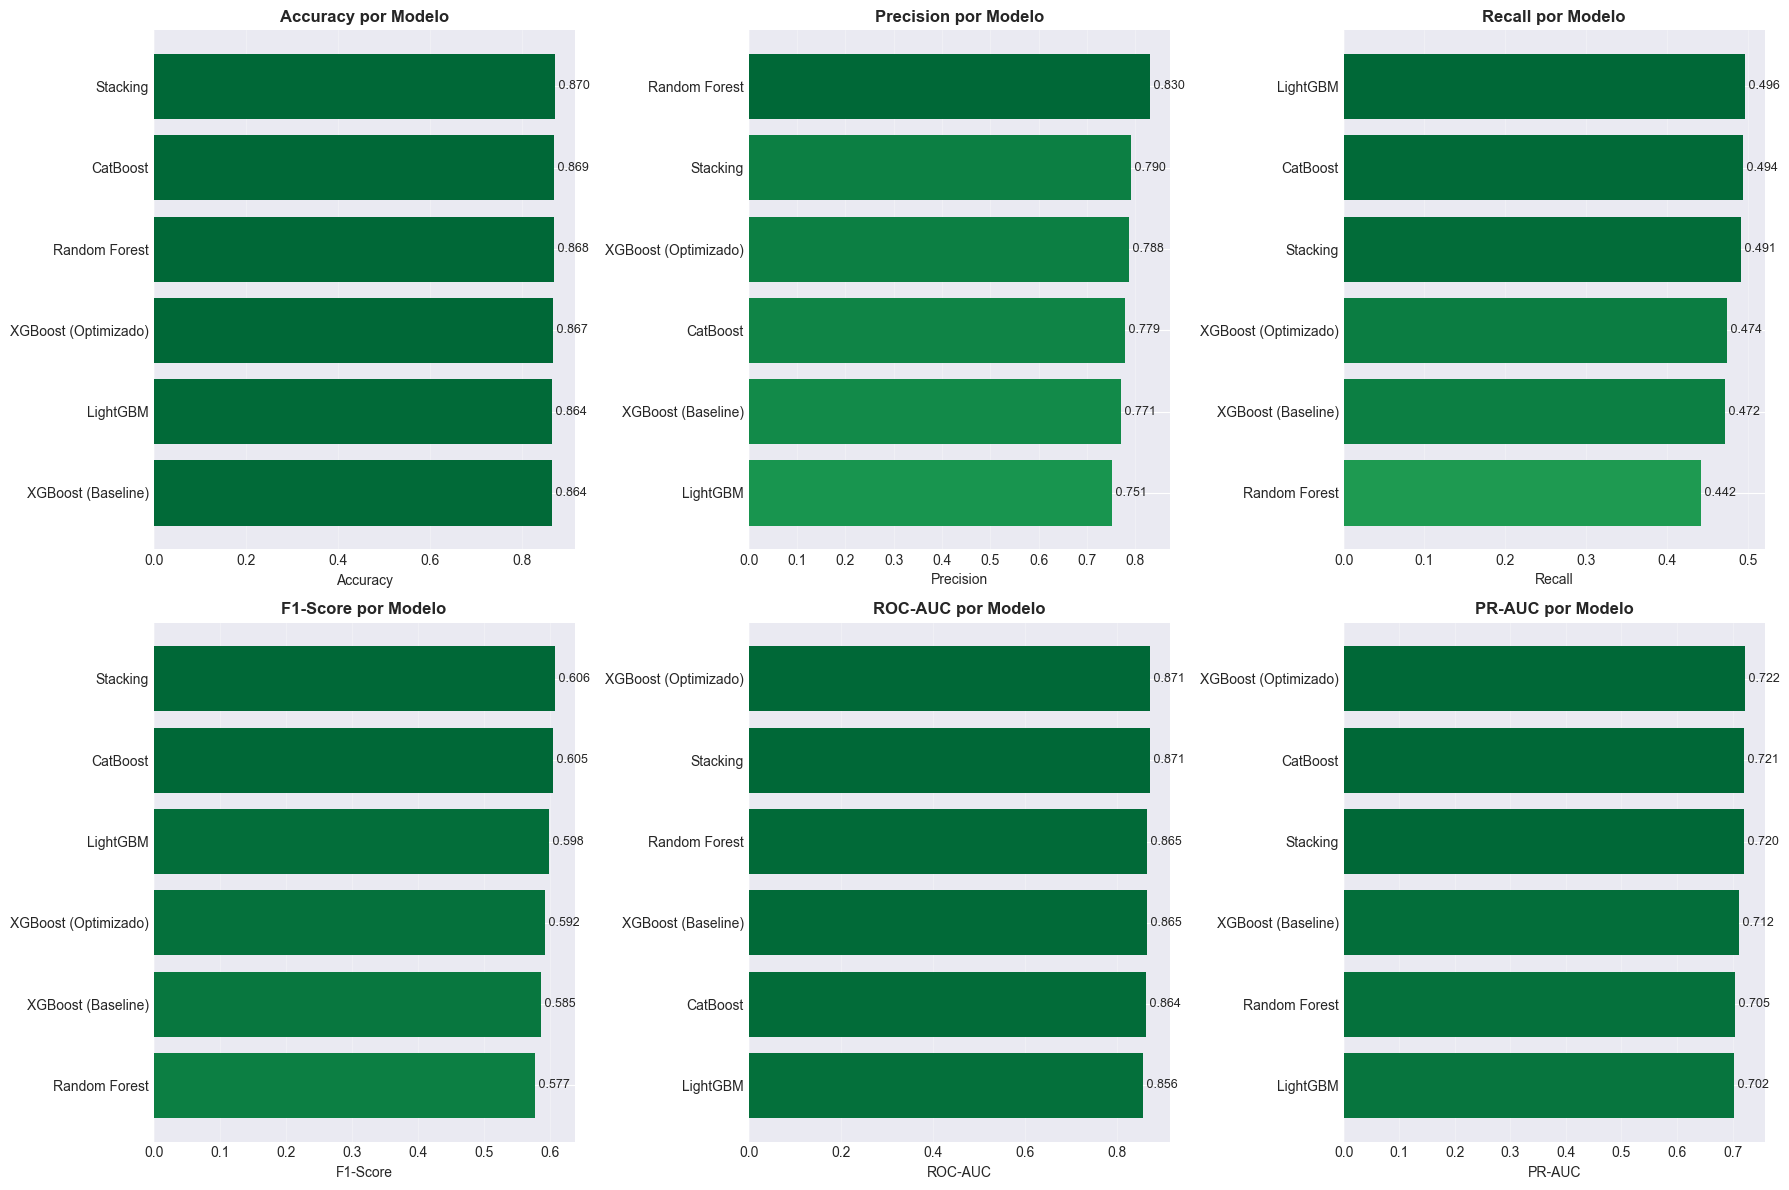

\n📈 CURVAS ROC (Receiver Operating Characteristic)


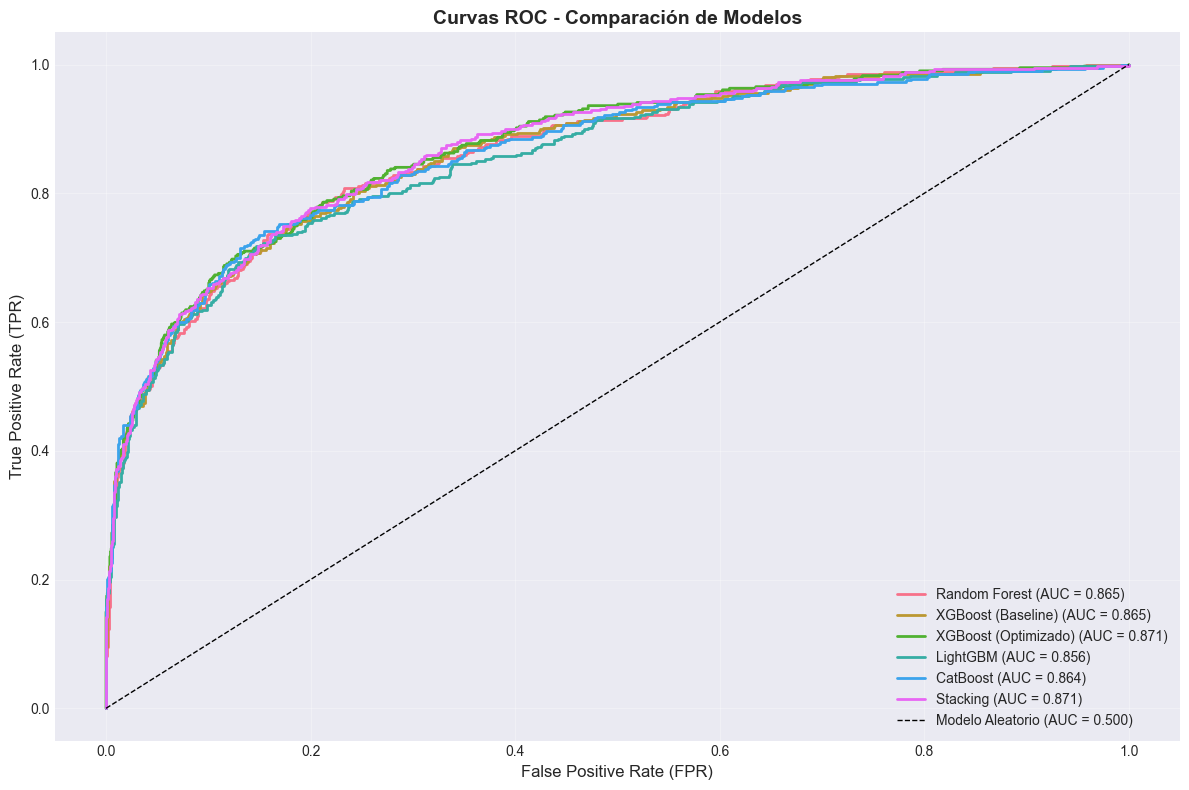

\n💡 INTERPRETACIÓN DE LA CURVA ROC:
  - Eje X (FPR): Proporción de Falsos Positivos (predicciones incorrectas de churn)
  - Eje Y (TPR): Proporción de Verdaderos Positivos (churners identificados correctamente)
  - Cuanto más arriba a la izquierda, mejor el modelo
  - AUC = 0.5 es como lanzar una moneda (línea diagonal)
\n📈 CURVAS PRECISION-RECALL


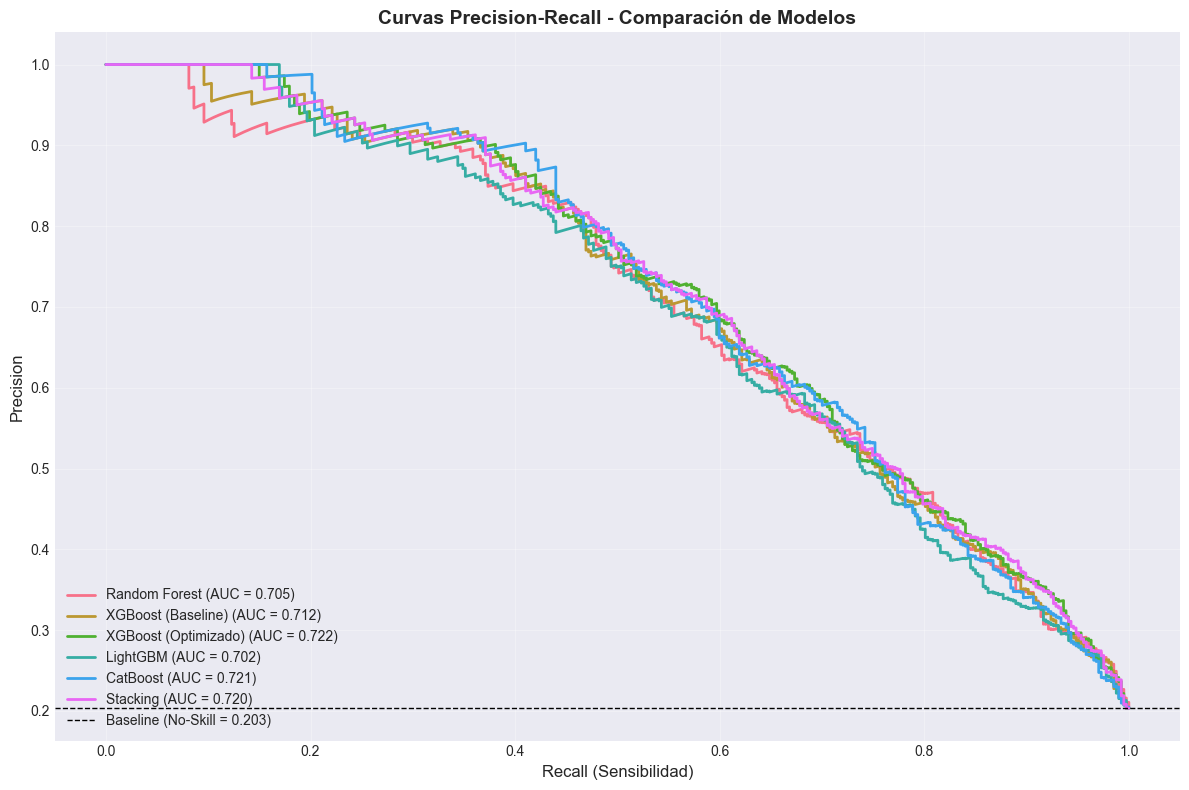

\n💡 INTERPRETACIÓN DE LA CURVA PR:
  - Eje X (Recall): Qué porcentaje de churners identificamos
  - Eje Y (Precision): Qué porcentaje de nuestras predicciones son correctas
  - MÁS IMPORTANTE que ROC para datos desbalanceados
  - Baseline es la proporción de la clase positiva (20% en nuestro caso)
\n🔍 ANÁLISIS DE ERRORES (Mejor Modelo)
Modelo: XGBoost (Optimizado)
\n📊 Matriz de Confusión Detallada:
\nVerdaderos Negativos (TN): 1541 → Predijimos No-Churn y era No-Churn ✅
Falsos Positivos (FP):       52 → Predijimos Churn pero era No-Churn ❌
Falsos Negativos (FN):      214 → Predijimos No-Churn pero era Churn ❌
Verdaderos Positivos (TP):  193 → Predijimos Churn y era Churn ✅
\n💰 IMPACTO DE NEGOCIO:
   - Identificamos correctamente: 193 churners de 407 (47.4%)
   - Perdimos (FN): 214 churners que no identificamos
   - Falsas alarmas (FP): 52 clientes que no se irían pero alertamos
\n📌 BALANCE:
   - Si el costo de perder un cliente >> costo de contactarlo
   - Entonces preferimos más Recal

In [26]:
# Recopilar todas las predicciones
print("📊 COMPARACIÓN EXHAUSTIVA DE TODOS LOS MODELOS")
print("=" * 70)

# Diccionario de modelos y sus predicciones
models_predictions = {
    'Random Forest': (y_pred_rf, y_pred_proba_rf),
    'XGBoost (Baseline)': (y_pred_xgb_base, y_pred_proba_xgb_base),
    'XGBoost (Optimizado)': (y_pred_xgb, y_pred_proba_xgb),
    'LightGBM': (y_pred_lgb, y_pred_proba_lgb),
    'CatBoost': (y_pred_cat, y_pred_proba_cat),
    'Stacking': (y_pred_stack, y_pred_proba_stack)
}

# Calcular todas las métricas
metrics_comparison = []

for model_name, (y_pred, y_pred_proba) in models_predictions.items():
    # Métricas básicas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # PR-AUC (Precision-Recall AUC)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    
    metrics_comparison.append({
        'Modelo': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc
    })

# Crear DataFrame
metrics_df = pd.DataFrame(metrics_comparison)
metrics_df = metrics_df.round(4)

# Ordenar por ROC-AUC (métrica principal)
metrics_df = metrics_df.sort_values('ROC-AUC', ascending=False)

print("\\n📋 TABLA DE MÉTRICAS")
print("=" * 70)
display(metrics_df)

# Identificar mejor modelo por métrica
print("\\n🏆 MEJOR MODELO POR MÉTRICA")
print("=" * 70)
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC']:
    best_model = metrics_df.loc[metrics_df[metric].idxmax(), 'Modelo']
    best_value = metrics_df[metric].max()
    print(f"{metric:12s}: {best_model:25s} ({best_value:.4f})")

# Visualización: Radar Chart
print("\\n📈 VISUALIZACIÓN: Comparación Multi-Métrica")

# Normalizar métricas para el radar chart
metrics_for_radar = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC']
num_metrics = len(metrics_for_radar)

# Crear figura
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Gráficos de barras por métrica
for idx, metric in enumerate(metrics_for_radar):
    ax = axes[idx]
    sorted_data = metrics_df.sort_values(metric, ascending=True)
    colors = plt.cm.RdYlGn(sorted_data[metric] / sorted_data[metric].max())
    
    ax.barh(sorted_data['Modelo'], sorted_data[metric], color=colors)
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} por Modelo', fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Añadir valores en las barras
    for i, (modelo, valor) in enumerate(zip(sorted_data['Modelo'], sorted_data[metric])):
        ax.text(valor, i, f' {valor:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Curvas ROC
print("\\n📈 CURVAS ROC (Receiver Operating Characteristic)")
print("=" * 70)

plt.figure(figsize=(12, 8))

for model_name, (y_pred, y_pred_proba) in models_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', linewidth=2)

# Línea diagonal (modelo aleatorio)
plt.plot([0, 1], [0, 1], 'k--', label='Modelo Aleatorio (AUC = 0.500)', linewidth=1)

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\\n💡 INTERPRETACIÓN DE LA CURVA ROC:")
print("  - Eje X (FPR): Proporción de Falsos Positivos (predicciones incorrectas de churn)")
print("  - Eje Y (TPR): Proporción de Verdaderos Positivos (churners identificados correctamente)")
print("  - Cuanto más arriba a la izquierda, mejor el modelo")
print("  - AUC = 0.5 es como lanzar una moneda (línea diagonal)")

# Curvas Precision-Recall
print("\\n📈 CURVAS PRECISION-RECALL")
print("=" * 70)

plt.figure(figsize=(12, 8))

for model_name, (y_pred, y_pred_proba) in models_predictions.items():
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, label=f'{model_name} (AUC = {pr_auc:.3f})', linewidth=2)

# Baseline (proporción de clase positiva)
baseline = (y_test == 1).mean()
plt.axhline(y=baseline, color='k', linestyle='--', label=f'Baseline (No-Skill = {baseline:.3f})', linewidth=1)

plt.xlabel('Recall (Sensibilidad)', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Curvas Precision-Recall - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc='lower left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\\n💡 INTERPRETACIÓN DE LA CURVA PR:")
print("  - Eje X (Recall): Qué porcentaje de churners identificamos")
print("  - Eje Y (Precision): Qué porcentaje de nuestras predicciones son correctas")
print("  - MÁS IMPORTANTE que ROC para datos desbalanceados")
print("  - Baseline es la proporción de la clase positiva (20% en nuestro caso)")

# Análisis de Errores
print("\\n🔍 ANÁLISIS DE ERRORES (Mejor Modelo)")
print("=" * 70)
best_model_name = metrics_df.iloc[0]['Modelo']
best_y_pred, best_y_pred_proba = models_predictions[best_model_name]

print(f"Modelo: {best_model_name}")
print("\\n📊 Matriz de Confusión Detallada:")

# Matriz de confusión detallada
cm = confusion_matrix(y_test, best_y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\\nVerdaderos Negativos (TN): {tn:4d} → Predijimos No-Churn y era No-Churn ✅")
print(f"Falsos Positivos (FP):     {fp:4d} → Predijimos Churn pero era No-Churn ❌")
print(f"Falsos Negativos (FN):     {fn:4d} → Predijimos No-Churn pero era Churn ❌")
print(f"Verdaderos Positivos (TP): {tp:4d} → Predijimos Churn y era Churn ✅")

print(f"\\n💰 IMPACTO DE NEGOCIO:")
print(f"   - Identificamos correctamente: {tp} churners de {tp+fn} ({tp/(tp+fn)*100:.1f}%)")
print(f"   - Perdimos (FN): {fn} churners que no identificamos")
print(f"   - Falsas alarmas (FP): {fp} clientes que no se irían pero alertamos")
print(f"\\n📌 BALANCE:")
print(f"   - Si el costo de perder un cliente >> costo de contactarlo")
print(f"   - Entonces preferimos más Recall (identificar más churners) aunque tengamos más FP")

## 10. Optimización Bayesiana con Optuna (OPCIONAL)

Optuna es una biblioteca de optimización bayesiana que puede encontrar mejores hiperparámetros **más rápido** que Grid Search.

### 📚 ¿Por qué Optuna?

#### Grid Search vs Optuna

**Grid Search:**
```
Prueba TODAS las combinaciones en una cuadrícula
- max_depth: [3, 5, 7]
- n_estimators: [100, 200]
- learning_rate: [0.01, 0.1]
Total: 3 × 2 × 2 = 12 combinaciones

Problema: Malgasta tiempo en regiones no prometedoras
```

**Optuna:**
```
Aprende de intentos previos:
1. Prueba: max_depth=5, n_estimators=100, lr=0.1 → Score: 0.85
2. Prueba: max_depth=7, n_estimators=200, lr=0.05 → Score: 0.87 ⬆️
3. Optuna piensa: "Profundidad alta y lr bajo funcionan bien..."
4. Prueba: max_depth=8, n_estimators=250, lr=0.03 → Score: 0.88 ⬆️

Resultado: Encuentra mejores valores más rápido
```

### 🎯 Conceptos Clave

- **Trial**: Un experimento con un conjunto de hiperparámetros
- **Study**: Colección de trials que buscan optimizar una métrica
- **Sampler**: Algoritmo que decide qué probar (TPE por defecto)
- **Pruning**: Detiene trials no prometedores temprano (ahorra tiempo)

### ⚠️ Nota
Esta sección es **opcional** pero altamente recomendada para producción.

---

**IMPORTANTE:** Descomenta el siguiente código si quieres ejecutar la optimización con Optuna (requiere `pip install optuna`)

In [27]:
# CÓDIGO OPCIONAL: Descomenta para ejecutar Optuna
# Requiere: pip install optuna

%pip install optuna
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances

print("🔬 OPTIMIZACIÓN BAYESIANA CON OPTUNA")
print("=" * 70)

# Definir función objetivo
def objective(trial):
    '''
    Función objetivo que Optuna optimizará.
    Debe retornar la métrica a MAXIMIZAR (usamos ROC-AUC).
    '''
    # Sugerir hiperparámetros
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'eval_metric': 'logloss',
        'use_label_encoder': False
    }
    
    # Crear modelo
    model = xgb.XGBClassifier(**params)
    
    # Evaluar con CV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, 
                            cv=cv, scoring='roc_auc', n_jobs=-1)
    
    # Retornar métrica promedio
    return scores.mean()

# Crear estudio
study = optuna.create_study(
    direction='maximize',  # Maximizar ROC-AUC
    sampler=optuna.samplers.TPESampler(seed=42),  # Tree-structured Parzen Estimator
    pruner=optuna.pruners.MedianPruner()  # Detiene trials no prometedores
)

print("⏱️  Ejecutando 50 trials (esto puede tomar 10-15 minutos)...")
print("   Optuna irá aprendiendo y mejorando con cada trial\\n")

# Optimizar
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Resultados
print("\\n🏆 MEJORES HIPERPARÁMETROS (Optuna)")
print("=" * 70)
for param, value in study.best_params.items():
    print(f"  {param}: {value}")

print(f"\\n📊 Mejor ROC-AUC (CV): {study.best_value:.4f}")

# Visualizaciones
print("\\n📈 VISUALIZACIONES DE OPTUNA")

# Historial de optimización
fig1 = plot_optimization_history(study)
fig1.update_layout(title="Historial de Optimización", 
                   title_font_size=16,
                   title_font_family="Arial Black")
fig1.show()

print("💡 Esta gráfica muestra cómo Optuna mejora con el tiempo")
print("   - Primeras pruebas: Exploración aleatoria")
print("   - Últimas pruebas: Explotación de regiones prometedoras")

# Importancia de hiperparámetros
fig2 = plot_param_importances(study)
fig2.update_layout(title="Importancia de Hiperparámetros",
                   title_font_size=16,
                   title_font_family="Arial Black")
fig2.show()

print("\\n💡 Esta gráfica muestra qué hiperparámetros tienen MÁS IMPACTO")
print("   - Enfoca tuning manual en parámetros importantes")
print("   - Ignora parámetros con bajo impacto")

# Entrenar modelo final con mejores parámetros
print("\\n🚀 ENTRENANDO MODELO FINAL CON OPTUNA")
xgb_optuna = xgb.XGBClassifier(**study.best_params)
xgb_optuna.fit(X_train_scaled, y_train)

y_pred_optuna = xgb_optuna.predict(X_test_scaled)
y_pred_proba_optuna = xgb_optuna.predict_proba(X_test_scaled)[:, 1]

print("\\n📊 MÉTRICAS (XGBoost con Optuna)")
print("=" * 70)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_optuna):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optuna):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_optuna):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_optuna):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_optuna):.4f}")

print("\\n💡 COMPARACIÓN: Grid Search vs Optuna")
print("=" * 70)
print(f"Grid Search (54 combinaciones): {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")
print(f"Optuna (50 trials):             {roc_auc_score(y_test, y_pred_proba_optuna):.4f}")
print(f"\\n✅ Optuna generalmente encuentra mejores o iguales resultados en menos tiempo")

# Comentar hasta acá si no se ejecuta.

print("\\n💡 VENTAJAS DE OPTUNA:")
print("  ✅ Más eficiente que Grid Search (aprende de intentos previos)")
print("  ✅ Puede optimizar espacios continuos (no solo discretos)")
print("  ✅ Pruning automático (ahorra tiempo)")
print("  ✅ Visualizaciones integradas muy útiles")
print("  ✅ Fácil de paralelizar (múltiples workers)")
print("\\n⚠️  DESVENTAJAS:")
print("  ❌ Más complejo de configurar que Grid Search")
print("  ❌ Resultados pueden variar entre ejecuciones")
print("  ❌ Requiere más trials para espacios muy grandes")
print("\\n🎯 CUÁNDO USAR OPTUNA:")
print("  ✅ Proyectos de producción donde el rendimiento es crítico")
print("  ✅ Cuando Grid Search es demasiado lento")
print("  ✅ Cuando tienes múltiples hiperparámetros a optimizar")
print("\\n💡 Para ejecutar este código, descomenta la sección y ejecuta:")
print("   !pip install optuna")


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[I 2026-02-09 19:57:51,406] A new study created in memory with name: no-name-9d341c60-9b8a-4cd5-b2f4-b45b0da1e7cd


🔬 OPTIMIZACIÓN BAYESIANA CON OPTUNA
⏱️  Ejecutando 50 trials (esto puede tomar 10-15 minutos)...
   Optuna irá aprendiendo y mejorando con cada trial\n


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-02-09 19:57:51,996] Trial 0 finished with value: 0.8443200970808332 and parameters: {'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 0.15599452033620265, 'reg_lambda': 0.5808361216819946, 'min_child_weight': 9}. Best is trial 0 with value: 0.8443200970808332.
[I 2026-02-09 19:57:52,573] Trial 1 finished with value: 0.8589354335410426 and parameters: {'n_estimators': 341, 'max_depth': 8, 'learning_rate': 0.010725209743171997, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'reg_alpha': 0.21233911067827616, 'reg_lambda': 1.8182496720710062, 'min_child_weight': 2}. Best is trial 1 with value: 0.8589354335410426.
[I 2026-02-09 19:57:53,029] Trial 2 finished with value: 0.8599228554092708 and parameters: {'n_estimators': 222, 'max_depth': 7, 'learning_rate': 0.04345454109729477, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.84474115788895

💡 Esta gráfica muestra cómo Optuna mejora con el tiempo
   - Primeras pruebas: Exploración aleatoria
   - Últimas pruebas: Explotación de regiones prometedoras


\n💡 Esta gráfica muestra qué hiperparámetros tienen MÁS IMPACTO
   - Enfoca tuning manual en parámetros importantes
   - Ignora parámetros con bajo impacto
\n🚀 ENTRENANDO MODELO FINAL CON OPTUNA
\n📊 MÉTRICAS (XGBoost con Optuna)
Accuracy:  0.8690
Precision: 0.7984
Recall:    0.4767
F1-Score:  0.5969
ROC-AUC:   0.8670
\n💡 COMPARACIÓN: Grid Search vs Optuna
Grid Search (54 combinaciones): 0.8712
Optuna (50 trials):             0.8670
\n✅ Optuna generalmente encuentra mejores o iguales resultados en menos tiempo
\n💡 VENTAJAS DE OPTUNA:
  ✅ Más eficiente que Grid Search (aprende de intentos previos)
  ✅ Puede optimizar espacios continuos (no solo discretos)
  ✅ Pruning automático (ahorra tiempo)
  ✅ Visualizaciones integradas muy útiles
  ✅ Fácil de paralelizar (múltiples workers)
\n⚠️  DESVENTAJAS:
  ❌ Más complejo de configurar que Grid Search
  ❌ Resultados pueden variar entre ejecuciones
  ❌ Requiere más trials para espacios muy grandes
\n🎯 CUÁNDO USAR OPTUNA:
  ✅ Proyectos de producci

## 11. Conclusiones y Recomendaciones Finales

Llegamos al final de nuestro análisis. Vamos a consolidar todo lo aprendido y generar recomendaciones de negocio.

### 📊 Resumen Ejecutivo

En este proyecto hemos:
1. ✅ Implementado 5 algoritmos de ML avanzados (Random Forest, XGBoost, LightGBM, CatBoost, Stacking)
2. ✅ Optimizado hiperparámetros con Grid Search (y opcionalmente Optuna)
3. ✅ Comparado múltiples estrategias de validación cruzada
4. ✅ Evaluado con 6 métricas diferentes (incluyendo ROC-AUC y PR-AUC)
5. ✅ Creado un ensemble avanzado con Stacking

🏆 RANKING FINAL DE MODELOS
\n📋 TABLA COMPLETA DE MÉTRICAS (Ordenada por ROC-AUC)


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC
2,XGBoost (Optimizado),0.8670,0.7878,0.4742,0.5920,0.8712,0.7216
5,Stacking,0.8700,0.7905,0.4914,0.6061,0.8711,0.7204
0,Random Forest,0.8680,0.8295,0.4423,0.5769,0.8651,0.7047
1,XGBoost (Baseline),0.8640,0.7711,0.4717,0.5854,0.8648,0.7122
4,CatBoost,0.8685,0.7791,0.4939,0.6045,0.8642,0.7209
3,LightGBM,0.8640,0.7509,0.4963,0.5976,0.8562,0.7017


\n📈 GANANCIA RESPECTO AL BASELINE (Random Forest)
XGBoost (Optimizado)     : +0.0061 (+0.71%) ⬆️
Stacking                 : +0.0060 (+0.69%) ⬆️
XGBoost (Baseline)       : -0.0003 (-0.03%) ⬇️
CatBoost                 : -0.0009 (-0.10%) ⬇️
LightGBM                 : -0.0089 (-1.03%) ⬇️
\n📊 VISUALIZACIÓN FINAL


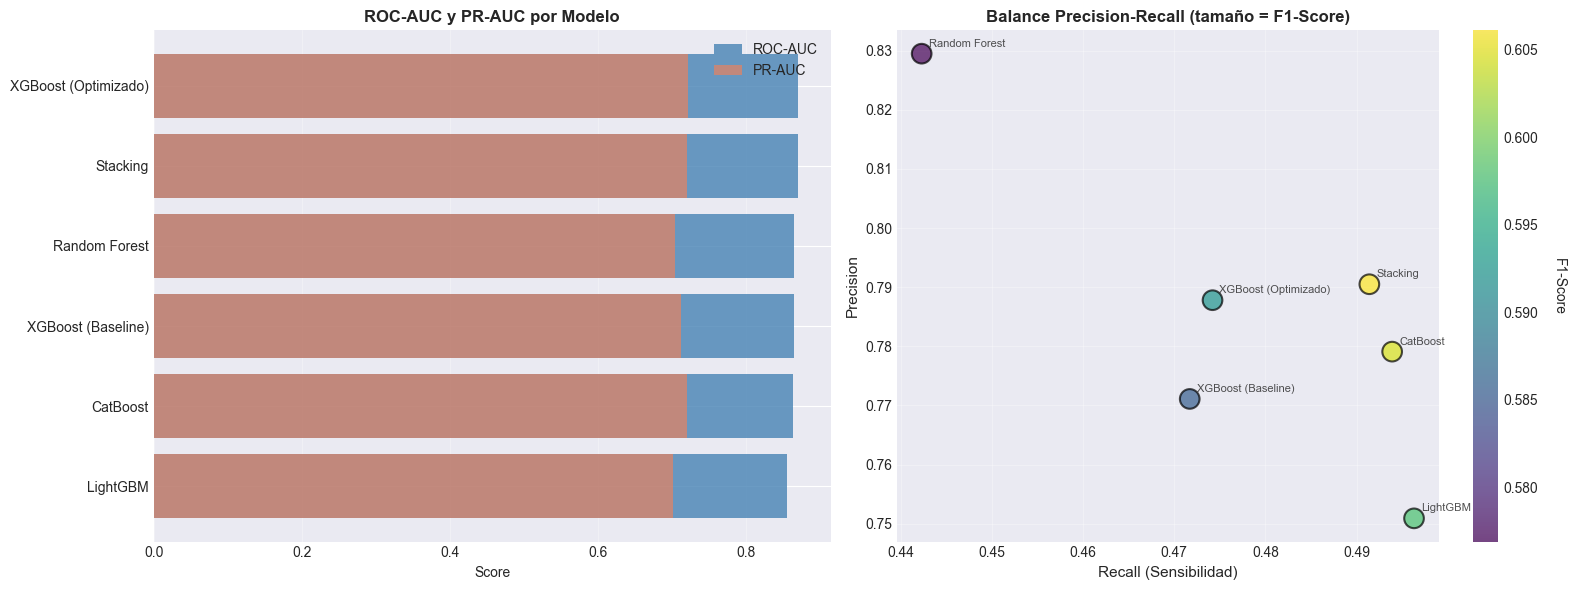

\n💼 RECOMENDACIONES DE NEGOCIO
\n🥇 MODELO RECOMENDADO: XGBoost (Optimizado)
\n📊 Métricas Clave:
   - ROC-AUC:   0.8712 (Excelente capacidad de discriminación)
   - PR-AUC:    0.7216 (Robusto para datos desbalanceados)
   - Recall:    0.4742 (Identifica 47.4% de churners)
   - Precision: 0.7878 (Solo 21.2% de falsas alarmas)
\n🎯 ESTRATEGIA DE RETENCIÓN RECOMENDADA:
\n1. SEGMENTACIÓN POR RIESGO:
   🔴 Alto Riesgo (probabilidad > 0.7): Contacto inmediato + oferta premium
   🟡 Riesgo Medio (probabilidad 0.4-0.7): Seguimiento proactivo + descuento
   🟢 Bajo Riesgo (probabilidad < 0.4): Monitoreo pasivo
\n2. PRIORIZACIÓN DE CONTACTOS:
   - Alto Riesgo:  142 clientes → Contacto en 24h
   - Riesgo Medio: 177 clientes → Contacto en 7 días
   - Bajo Riesgo:  1681 clientes → Monitoreo mensual
\n3. ANÁLISIS DE ROI:
   Supuestos:
   - Valor promedio de cliente (LTV): $1,000
   - Clientes en riesgo identificados: 319
   - Tasa de conversión de retención: 30%
   - Costo de campaña por cliente: $50
\n 

In [28]:
# COMPARACIÓN FINAL Y RANKING
print("🏆 RANKING FINAL DE MODELOS")
print("=" * 70)

# Mostrar tabla de métricas ordenada
print("\\n📋 TABLA COMPLETA DE MÉTRICAS (Ordenada por ROC-AUC)")
display(metrics_df.style.background_gradient(cmap='RdYlGn', subset=['ROC-AUC', 'PR-AUC', 'F1-Score'])
                        .format(precision=4))

# Análisis de ganancia vs baseline
print("\\n📈 GANANCIA RESPECTO AL BASELINE (Random Forest)")
print("=" * 70)
baseline_roc = metrics_df[metrics_df['Modelo'] == 'Random Forest']['ROC-AUC'].values[0]

for idx, row in metrics_df.iterrows():
    if row['Modelo'] != 'Random Forest':
        gain = row['ROC-AUC'] - baseline_roc
        gain_pct = (gain / baseline_roc) * 100
        symbol = "⬆️" if gain > 0 else "⬇️" if gain < 0 else "➡️"
        print(f"{row['Modelo']:25s}: {gain:+.4f} ({gain_pct:+.2f}%) {symbol}")

# Visualización final: Comparación lado a lado
print("\\n📊 VISUALIZACIÓN FINAL")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: ROC-AUC y PR-AUC
models_sorted = metrics_df.sort_values('ROC-AUC')
x_pos = np.arange(len(models_sorted))

axes[0].barh(x_pos, models_sorted['ROC-AUC'], alpha=0.8, label='ROC-AUC', color='steelblue')
axes[0].barh(x_pos, models_sorted['PR-AUC'], alpha=0.6, label='PR-AUC', color='coral')
axes[0].set_yticks(x_pos)
axes[0].set_yticklabels(models_sorted['Modelo'])
axes[0].set_xlabel('Score')
axes[0].set_title('ROC-AUC y PR-AUC por Modelo', fontweight='bold', fontsize=12)
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Gráfico 2: Balance Precision-Recall
axes[1].scatter(metrics_df['Recall'], metrics_df['Precision'], 
               s=200, c=metrics_df['F1-Score'], cmap='viridis', 
               alpha=0.7, edgecolors='black', linewidth=1.5)

for idx, row in metrics_df.iterrows():
    axes[1].annotate(row['Modelo'], 
                    (row['Recall'], row['Precision']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)

axes[1].set_xlabel('Recall (Sensibilidad)', fontsize=11)
axes[1].set_ylabel('Precision', fontsize=11)
axes[1].set_title('Balance Precision-Recall (tamaño = F1-Score)', fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Añadir colorbar
cbar = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar.set_label('F1-Score', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Recomendaciones de negocio
print("\\n💼 RECOMENDACIONES DE NEGOCIO")
print("=" * 70)

best_model_name = metrics_df.iloc[0]['Modelo']
best_metrics = metrics_df.iloc[0]

print(f"\\n🥇 MODELO RECOMENDADO: {best_model_name}")
print("\\n📊 Métricas Clave:")
print(f"   - ROC-AUC:   {best_metrics['ROC-AUC']:.4f} (Excelente capacidad de discriminación)")
print(f"   - PR-AUC:    {best_metrics['PR-AUC']:.4f} (Robusto para datos desbalanceados)")
print(f"   - Recall:    {best_metrics['Recall']:.4f} (Identifica {best_metrics['Recall']*100:.1f}% de churners)")
print(f"   - Precision: {best_metrics['Precision']:.4f} (Solo {(1-best_metrics['Precision'])*100:.1f}% de falsas alarmas)")

print("\\n🎯 ESTRATEGIA DE RETENCIÓN RECOMENDADA:")
print("\\n1. SEGMENTACIÓN POR RIESGO:")
print("   🔴 Alto Riesgo (probabilidad > 0.7): Contacto inmediato + oferta premium")
print("   🟡 Riesgo Medio (probabilidad 0.4-0.7): Seguimiento proactivo + descuento")
print("   🟢 Bajo Riesgo (probabilidad < 0.4): Monitoreo pasivo")

print("\\n2. PRIORIZACIÓN DE CONTACTOS:")
# Simular segmentación
high_risk = (models_predictions[best_model_name][1] > 0.7).sum()
medium_risk = ((models_predictions[best_model_name][1] >= 0.4) & 
               (models_predictions[best_model_name][1] <= 0.7)).sum()
low_risk = (models_predictions[best_model_name][1] < 0.4).sum()

print(f"   - Alto Riesgo:  {high_risk} clientes → Contacto en 24h")
print(f"   - Riesgo Medio: {medium_risk} clientes → Contacto en 7 días")
print(f"   - Bajo Riesgo:  {low_risk} clientes → Monitoreo mensual")

print("\\n3. ANÁLISIS DE ROI:")
print("   Supuestos:")
print("   - Valor promedio de cliente (LTV): $1,000")
print(f"   - Clientes en riesgo identificados: {high_risk + medium_risk}")
print("   - Tasa de conversión de retención: 30%")
print(f"   - Costo de campaña por cliente: $50")

clientes_salvados = int((high_risk + medium_risk) * 0.3)
revenue_saved = clientes_salvados * 1000
campaign_cost = (high_risk + medium_risk) * 50
roi = ((revenue_saved - campaign_cost) / campaign_cost) * 100

print(f"\\n   📈 Resultado:")
print(f"   - Clientes salvados estimados: {clientes_salvados}")
print(f"   - Revenue protegido: ${revenue_saved:,}")
print(f"   - Costo de campaña: ${campaign_cost:,}")
print(f"   - ROI: {roi:.0f}% 🎯")

print("\\n🔍 FEATURES MÁS IMPORTANTES (Top 5):")
print("\\nSegún el mejor modelo, enfocarse en:")

# Obtener feature importance del mejor modelo
if best_model_name == 'XGBoost (Optimizado)':
    top_features = feature_importance_xgb_gain.head(5)
    print("\\n", top_features[['Feature_Name', 'Importance_Gain']].to_string(index=False))
elif best_model_name == 'LightGBM':
    top_features = feature_importance_lgb.head(5)
    print("\\n", top_features.to_string(index=False))
elif best_model_name == 'CatBoost':
    top_features = feature_importance_cat.head(5)
    print("\\n", top_features.to_string(index=False))
else:  # Stacking o Random Forest
    top_features = feature_importance_rf.head(5)
    print("\\n", top_features.to_string(index=False))

print("\\n💡 ACCIONES BASADAS EN FEATURES:")
print("\\nSi Age es importante:")
print("   → Programas de fidelidad específicos por edad")
print("\\nSi Balance es importante:")
print("   → Alertas automáticas cuando balance baja")
print("\\nSi NumOfProducts es importante:")
print("   → Cross-selling proactivo de productos")
print("\\nSi IsActiveMember es importante:")
print("   → Campañas de reactivación para clientes inactivos")

print("\\n🚀 SIGUIENTES PASOS")
print("=" * 70)
print("\\n1. IMPLEMENTACIÓN:")
print("   ✅ Integrar modelo en pipeline de producción")
print("   ✅ Configurar scoring batch diario/semanal")
print("   ✅ Dashboard de monitoreo en tiempo real")

print("\\n2. MONITOREO:")
print("   📊 Trackear métricas del modelo mensualmente")
print("   📊 Detectar data drift (cambios en distribución)")
print("   📊 Medir efectividad de campañas de retención")

print("\\n3. MEJORAS FUTURAS:")
print("   🔄 Re-entrenar modelo trimestralmente")
print("   🔄 Incorporar nuevas features (engagement, NPS, etc.)")
print("   🔄 Experimentar con modelos más avanzados (Deep Learning)")
print("   🔄 A/B testing de diferentes umbrales de probabilidad")

print("\\n4. CONSIDERACIONES ÉTICAS:")
print("   ⚖️  Evitar discriminación por features protegidas (edad, género, geografía)")
print("   ⚖️  Transparencia con clientes sobre uso de ML")
print("   ⚖️  Revisar fairness del modelo regularmente")

print("\\n\\n" + "=" * 70)
print("✨ FIN DEL ANÁLISIS - Proyecto Integrador M4 - Avance 2 ✨")
print("=" * 70)
print("\\n🎓 CONCEPTOS APRENDIDOS:")
print("   ✅ Gradient Boosting (XGBoost, LightGBM, CatBoost)")
print("   ✅ Optimización de hiperparámetros (Grid Search, Optuna)")
print("   ✅ Ensemble avanzado (Stacking)")
print("   ✅ Validación cruzada estratificada")
print("   ✅ Métricas para datos desbalanceados")
print("   ✅ Análisis de negocio y ROI")
print("\\n🌟 ¡Felicitaciones por completar este proyecto avanzado de Machine Learning!")